# 07 - Newtonov zakon
<p style="font-weight: 600; text-align: center;">
Matematično-fizikalni praktikum, avgust 2024 <br>
Luka Skeledžija, 28201079
</p>

<style>
.MJXc-display{
    display: inline-block !important;
    width: 100%;
}
@media print {
    .pagebreak { page-break-before: always; } /* page-break-after works, as well */
}

img{
    width: 100%;
    max-width: 600px !important;
    margin: auto !important;
}

body {
    overflow: hidden;
    max-width: 600px;
    margin: auto;
}

::-webkit-scrollbar {
  width: 0px;
}

table{
    width: 100%;
}

h1 {
    text-transform: uppercase;
    text-align: center;
    background: #222222;
    color: white;
    padding: 8px;
}

blockquote {
    margin-left: 0em!important;
    margin-right: 0em!important;

}

.jp-RenderedHTMLCommon pre, .jp-RenderedHTMLCommon code {

    background-color: var(--jp-layout-color2)!important;
}

.jp-RenderedHTMLCommon pre{
    margin: 0.5em 0em!important;
    padding: 0em 1.5em!important;
}

body {
    counter-reset: h2counter;
}
h1 {
    counter-reset: h2counter;
}
h2:before {
    content: counter(h2counter) ".\0000a0\0000a0";
    counter-increment: h2counter;
    counter-reset: h3counter;
}
h3:before {
    counter-increment: h3counter;
    content: counter(h2counter) "." counter(h3counter) ".\0000a0\0000a0";
  
}




</style>


---

## Uvod

Gibanje masne točke v polju sil v eni dimenziji opišemo
z diferencialno enačbo drugega reda, z Newtonovim zakonom

\begin{equation*}
m\, \frac{d^2x}{dt^2} = F \>.
\end{equation*}

Enačba je seveda enakovredna sistemu enačb prvega reda
$$
m \, \frac{dx}{dt} = p \;, \qquad \frac{dp}{dt} = F
$$
in tako jo tudi rešujemo: kot sistem dveh enačb prvega reda.

Seveda morajo biti na voljo tudi ustrezni začetni pogoji, tipično
$x(t=0)=x_0$ in $dx/dt=v(t=0)=v_0$. Splošnejše gre tu za sistem diferencialnih
enačb drugega reda:
$$
\frac{d^ny}{dx^n} = f(x,y,y',y'',...),
$$
ki ga lahko prevedemo na sistem enačb prvega reda z uvedbo novih spremenljivk v slogu
gibalne količine pri Netwonovi enačbi ($y'=v,y''=z,...$).

Z nekaj truda se da eksplicitno dokazati, mi pa lahko privzamemo, da so metode za
reševanje enačb hoda (Runge-Kutta 4. reda, prediktor-korektor... ) neposredno uporabne
za reševanje takšnih sistemov enačb in torej aplikabilne v poljubno dimenzijah, kar
naj bi v principu zadovoljilo večino naših zahtev.

Obstaja še posebna kategorija tako imenovanih **simplektičnih** metod, za enačbe, kjer je $f$ le funkcija koordinat, $f(y)$, ki (približno) ohranjajo tudi Hamiltonian,
torej energijo sistema. Najbolj znana metoda je Verlet/Stormer/Encke metoda, ki je globalno
natančna do drugega reda in ki točno ohranja tudi vrtilno količino sistema (če je ta v danem problemu smiselna). Rešujemo torej za vsak diskretni korak $n$ velikosti $h$, $x_n=x_0+n \cdot h$:

$$
\frac{d^2y}{dx^2} = f(y)
$$

in pri diskretizaciji dobimo recept za korak $y_n$ in $v_n=y'_n$:

$$ y_{n+1} = y_n + h \cdot v_n + \frac{h^2}{2} \cdot f(y_n) \\$$

$$ v_{n+1} = v_n +  \frac{h}{2} \cdot \left[ f(y_n) + f(y_{n+1}) \right]. $$

Alternativno lahko to shemo zapišemo tudi s pomočjo dodatnih vmesnih točk in preskakujemo med lego in hitrostjo z zamikom h/2 (od tod angleško ime 'leapfrog' za ta zapis):

$$ y_{n+1} = y_n + h \cdot v_{n+1/2} \\ $$

$$ v_{n+3/2} = v_{n+1/2} + h \cdot f(y_{n+1}). $$

V še enem drugačnem zapisu je metoda poznana tudi kot metoda *Središčne razlike* (Central Difference Method, CDM), če nas hitrost ne zanima:

$$
y_{n+1} - 2 y_n + y_{n-1} = h^2 \cdot f(y_n),
$$

kjer prvo točko $y_1$ izračunamo po originalni shemi. Metodo CDM lahko uporabljamo tudi
za primere, ko je f tudi funkcija 'časa' x, f(x,y), le da tu simplektičnost ni zagotovljena
(in tudi verjetno ne relevantna).
Za simplektične metode višjih redov je na voljo na primer Forest-Ruth metoda ali Position
Extended Forest-Ruth Like (PEFRL) metoda, ki sta obe globalno četrtega reda in enostavni za
implementacijo.

## Naloga

1. Čim več metod uporabi za izračun
nihanja matematičnega nihala z začetnim pogojem  $\theta(0)= \theta_0 = 1$, $\dot{\theta}(0)=0$. 
Poišči korak, ki zadošča za natančnost na 3 mesta. Primerjaj
tudi periodično stabilnost shem: pusti, naj teče račun čez 10
ali 20 nihajev in poglej, kako se amplitude nihajev sistematično
kvarijo. Pomagaš si lahko tudi tako, da občasno izračunaš
energijo $E \propto  1-\cos \theta + \frac{\dot{\theta}^2 }{2 \omega_0^2} $. Nariši tudi
ustrezne fazne portrete!.

2. Dodatno: Razišči še resonančno krivuljo
vzbujenega dušenega matematičnega nihala
\begin{equation*}
\frac{d^2x}{dt^2} + \beta\frac{d^2x}{dt^2}+ \sin x = v\cos\omega_0t\>,
\end{equation*}
kjer je $\beta$ koeficient dušenja, $v$ in $\omega_0$ pa amplituda in
frekvenca vzbujanja.  Opazuj obnašanje odklonov in hitrosti nihala
pri dušenju $\beta=0.5$, vzbujevalni frekvenci $\omega_0=2/3$ in
amplitudo vzbujanja na območju $0.5 < v < 1.5$.
Poskusi opaziti histerezno obnašanje resonančne krivulje pri velikih amplitudah vzbujanja

## Matematično nihalo

Nihanje matematičnega nihala lahko opišemo z diferencialno enačbo: 

$$ \frac{d^2\theta}{dt^2} + \omega_0 \sin(\theta) = 0. $$

Če so odmiki majhni, lahko enačbo linearno aproksimiramo in dobimo harmonične rešitve kot:

$$ \theta (t) = \theta_0 \sin(\omega_0 t + \phi_0), $$

kjer sta $\theta_0$ in $\phi_0$ odvisna od začetnih pogojev. V splošnem pa zgodba ni tako preprosta in se moramo za nihajni čas in analitično rešitev časovnega poteka zateči k specialnim funkcijam. Nihajni čas lahko izračunamo s pomočjo eliptičnega integrala prve vrste, in sicer: 

$$ T_0 = \frac{4}{\omega_0} \int_0^{\pi / 2} \frac{d \varphi}{\sqrt{1 - \sin^2(\theta_0 /2) \sin^2 \varphi}} = \frac{4}{\omega_0} K(\sin^2(\theta_0 / 2)), $$

kjer $\theta_0$ predstavlja amplitudo nihanja. Časovni potek odmika pa je podan s pomočjo nepopolne eliptične funkcije prve vrste oz. Jacobijeve amplitudne funkcije $sn(u;m)$. Za amplitudo nihanja sledi

$$ \theta(t) = 2 \arcsin \left( \sin \frac{\theta_0}{2} \cdot sn(\omega_0 (T_0 / 4 - t), \sin^2(\theta_0 / 2)) \right).$$

### Ilustracija rešitev DE

Za začetek narišimo nekaj referenčnih grafov s pomočjo analitične rešitve. 

In [486]:
# Standardized imports for MFPR
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import seaborn as sns
from IPython.display import HTML, display
import markdown
import datetime
import scipy.special as sp
import scipy.stats as stats
import scipy.optimize as opt
import scipy.interpolate as interp
from matplotlib import animation
import logging
import timeit
# Function and constants defitition for Juptyer notebook (rerun for hot reload of imports)

plt.rcParams['figure.dpi'] = 300
plt.rcParams['text.usetex'] = True
plt.rcParams["grid.linestyle"]="dashed"
plt.rcParams["figure.edgecolor"] = "black"
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

def log_msg(msg, log_filename='my_log_file.log'):
    # Configure the logging module if not already configured
    if not logging.root.handlers:
        logging.basicConfig(
            filename=log_filename,
            level=logging.DEBUG,
            format='%(asctime)s - %(name)s - %(levelname)s - %(message)s'
        )

    # Create a logger for the function (you can replace 'my_function' with your desired logger name)
    logger = logging.getLogger('EIGENSTATES')

    # Log the provided message
    logger.info(msg)
def clear_log_file(log_filename='my_log_file.log'):
    with open(log_filename, 'w'):
        pass

def centerHTML(html, text=""):
    text = markdown.markdown(text)
    return '<div style="display: flex; align-items: center; flex-direction: column;">' + html + f'</div><div style="display: flex; align-items: center; flex-direction: column;padding-top: 15px;"><small style="max-width: 600px">{text}</small></div>'

def insertHTMLVideo(filename, text=""):
    return centerHTML(f'<video controls src="{filename}" style="max-width: 600px;width:100%"></video>', text)

def insertHTMLAudio(filename, text=""):
    return centerHTML(f'<audio controls src="{filename}" style="max-width: 600px;width:100%"></audio>', text)


clear_log_file()
log_msg('START logging...')


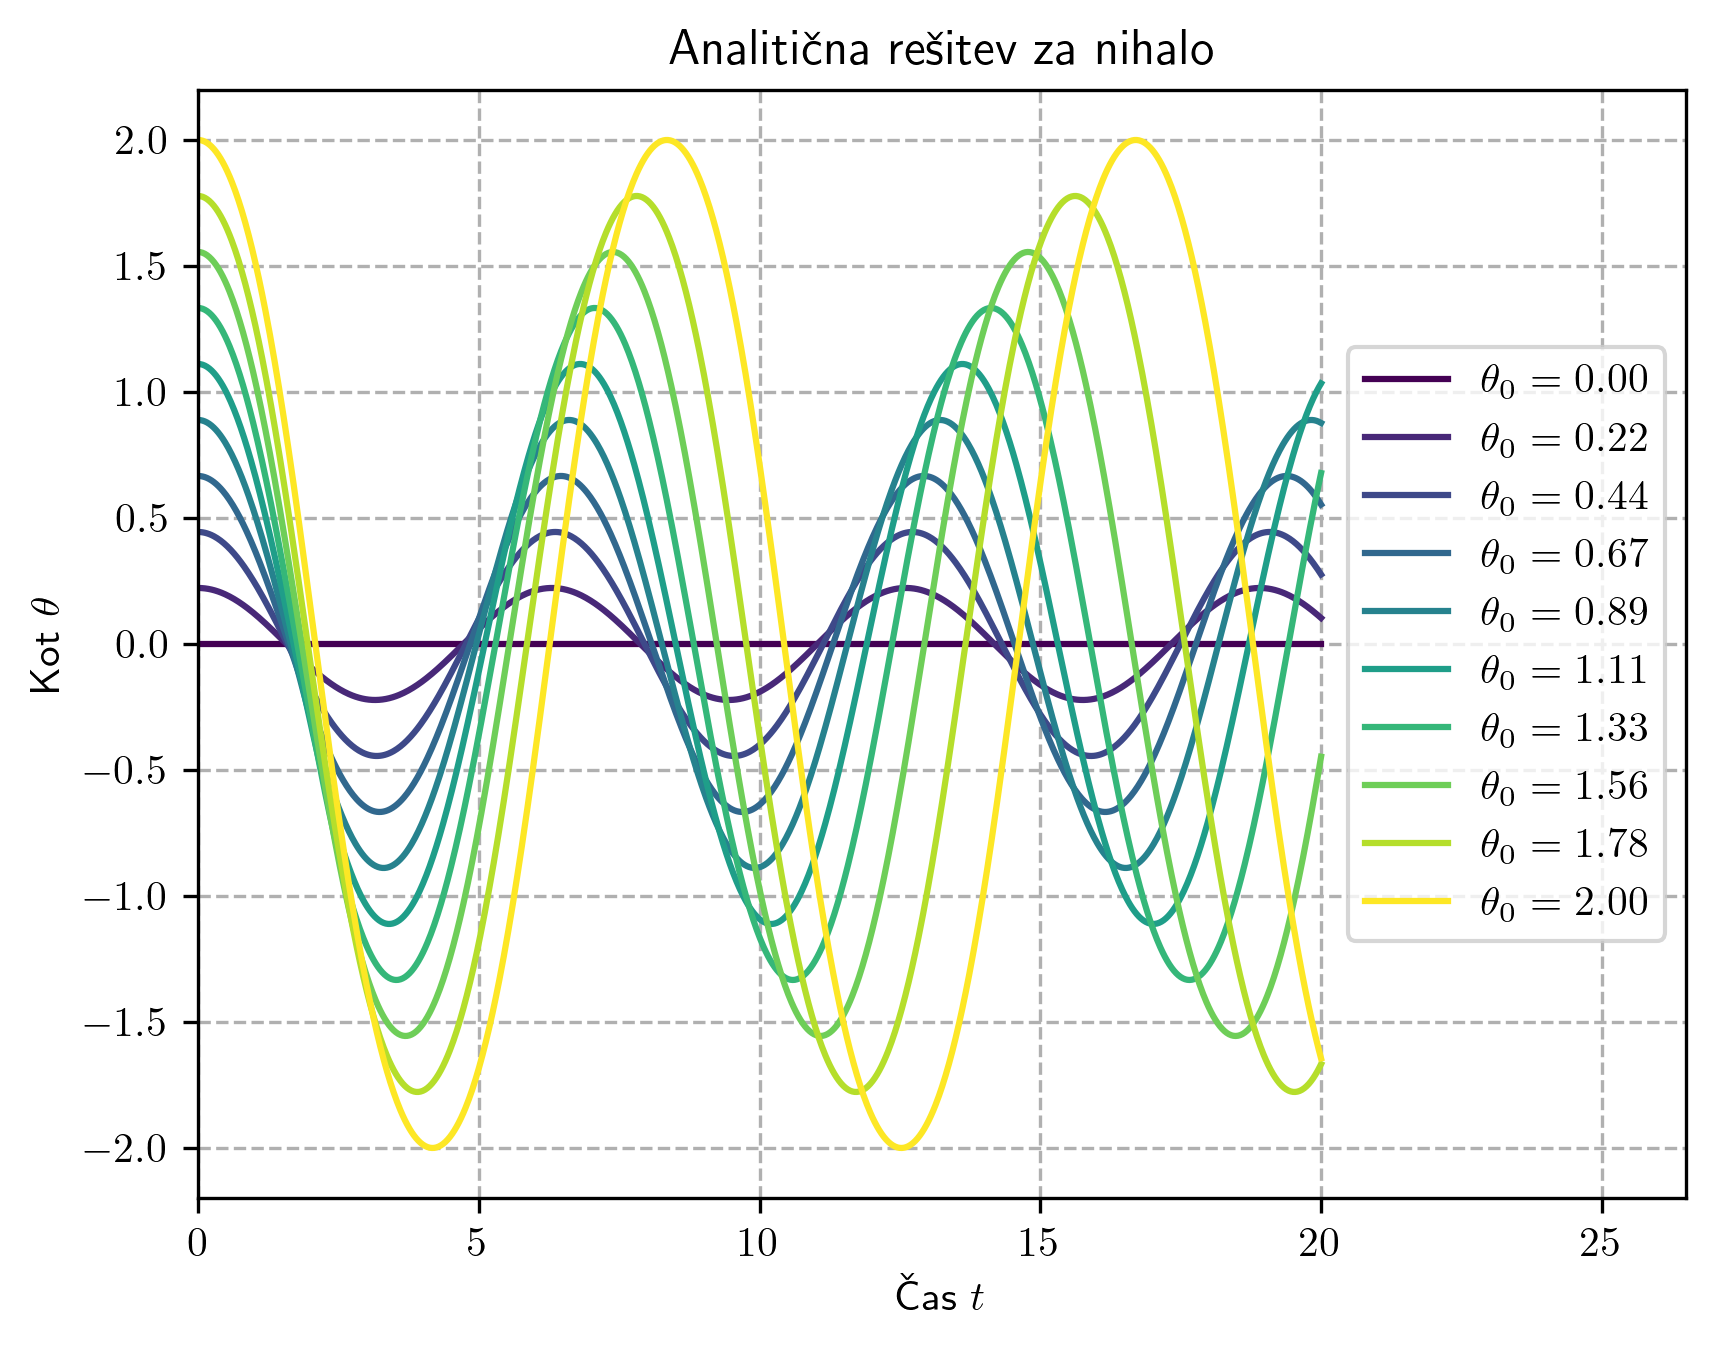

In [487]:
from scipy.special import ellipk, ellipj
from scipy.signal import find_peaks

# Začetni pogoji
theta_0 = np.pi * 3/4
theta_dot0 = 0
# Analitična rešitev

def theta_analytic(t, theta_0=1, theta_dot0=0):
    m = np.sin(theta_0 / 2)**2
    K = ellipk(m)
    omega_0 = 1
    return 2 * np.arcsin(np.sin(theta_0 / 2) * ellipj(K - omega_0*t, np.sin(theta_0 / 2)**2)[0])

def T_0_analytic(theta_0=1):
    m = np.sin(theta_0 / 2)**2
    K = ellipk(m)
    return 4 * K

t = np.linspace(0, 20, 1000)

theta = theta_analytic(t)
theta_0s = np.linspace(0, 2, 10)
cmap = plt.colormaps.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(theta_0s)))

for i, theta in enumerate(theta_0s):
    plt.plot(t, theta_analytic(t, theta), c=colors[i], label=f'$\\theta_0 = {theta:.2f}$')

plt.grid()
plt.xlim(0, 26.5)
plt.xlabel('Čas $t$')
plt.ylabel('Kot $\\theta$')
plt.title('Analitična rešitev za nihalo')
plt.legend(loc=5)
plt.show()

Nadaljujemo s fazno sliko rešitve DE. V teoriji bi enake rezultate dobili z odvajanjem analitične rešitve. A se tokrat kot predpripava za nadaljne raziskovanje odločimo rešitve pridobiti numerično s simplektično metodo Verlet.

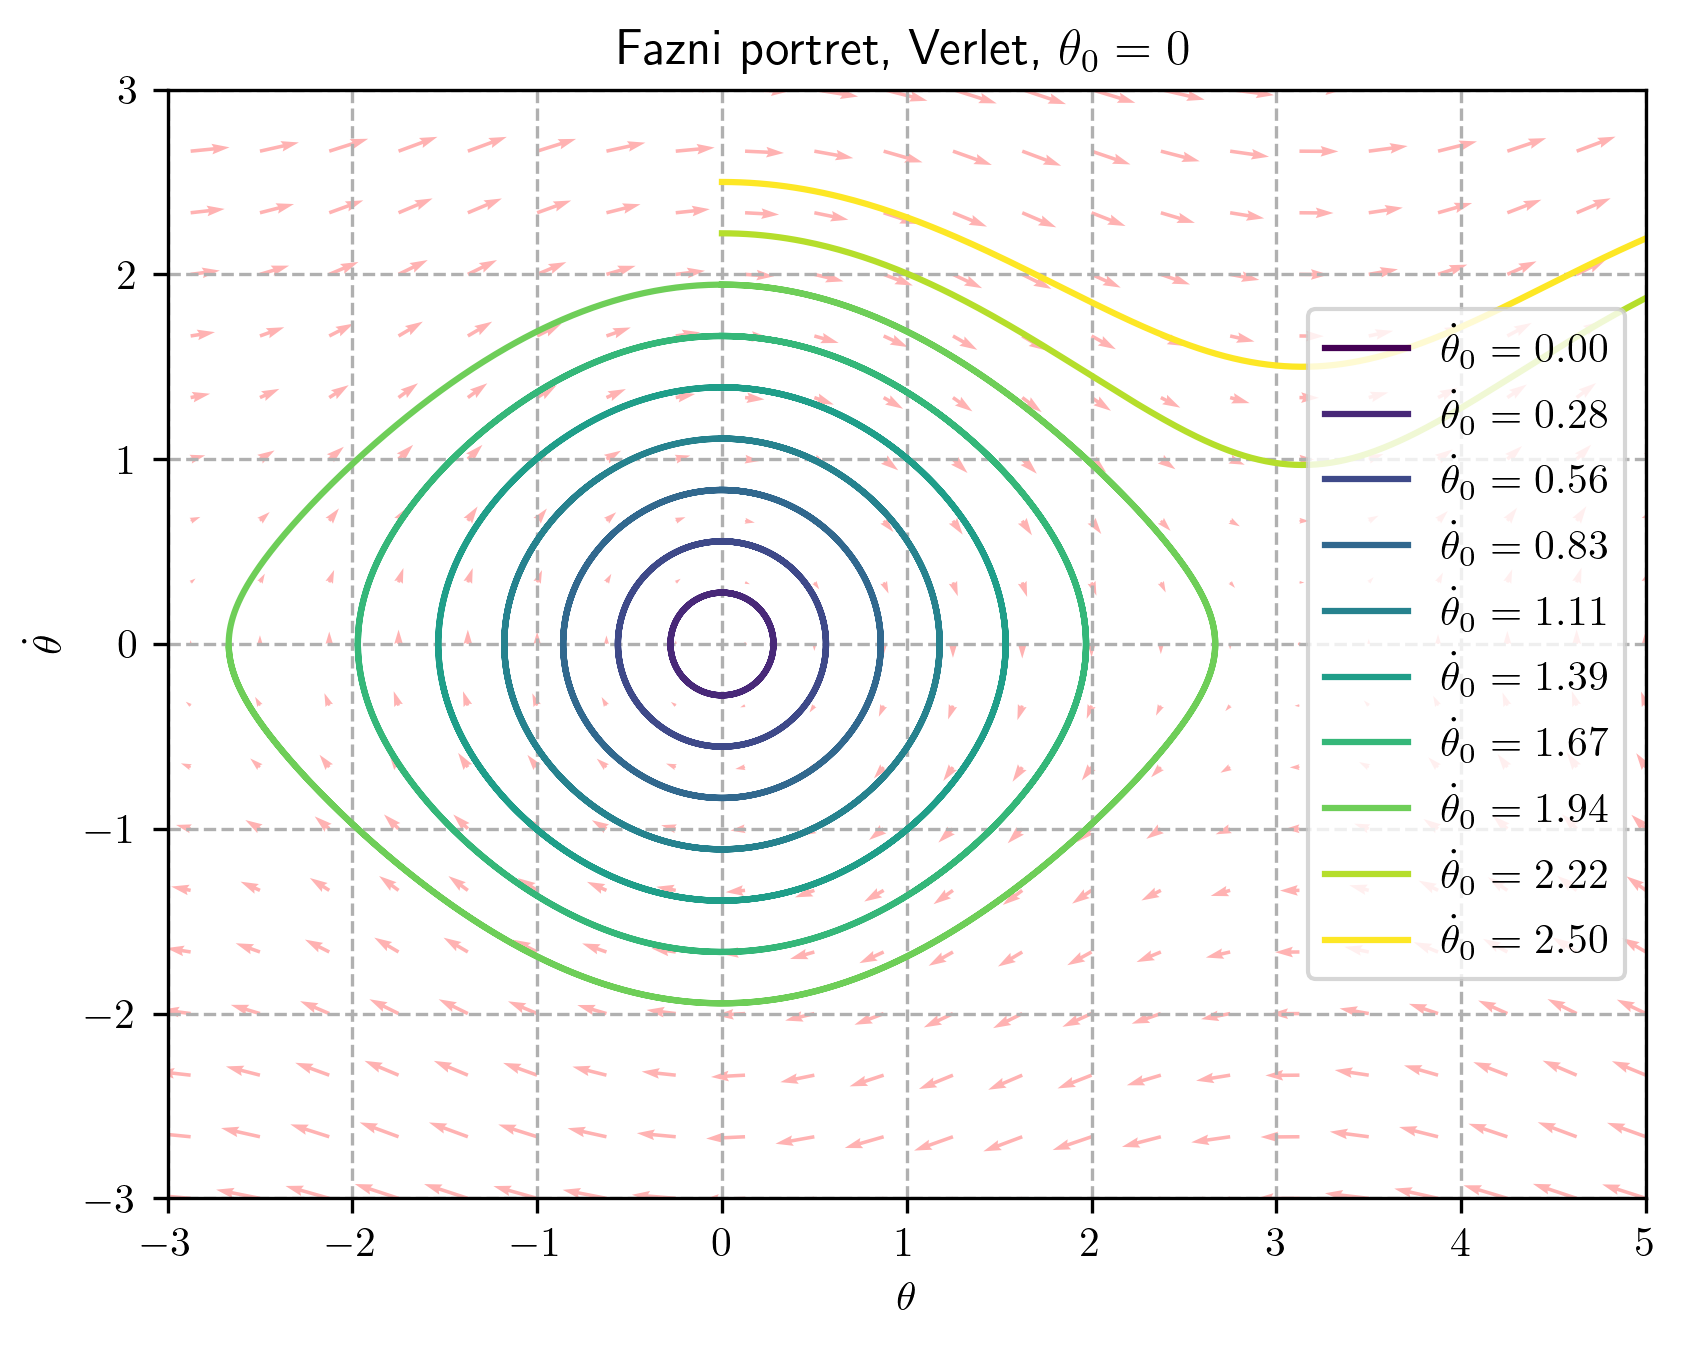

In [488]:
from scipy.misc import derivative
from diffeq_2 import euler, heun, rku4, verlet, pefrl

def prevajanje(y, t, k=np.float64(0.1), T_zun=np.float64(-5)):
    return - k * (y - T_zun)

def nihanje(theta):
    return -np.sin(theta)

def nihanje_vec(y, t):
    return np.array([y[1], -np.sin(y[0])])


plt.title('Fazni portret, Verlet')
plt.xlabel('Kot $\\theta$')
plt.ylabel('Hitrost $\\dot{\\theta}$')

theta_range = np.linspace(-4, 5, 25)
p_range = np.linspace(-4, 4, 25)

theta_pika = p_range
p_pika = -np.sin(theta_range)

U, V = np.meshgrid(theta_range, p_range)

U_copy = U.copy()
U = V
V = -np.sin(U_copy)

plt.quiver(theta_range, p_range, U, V, alpha=0.3, color='r')

t = np.arange(0, 20, 0.01)

theta_dot0s = np.linspace(0, 2.5, 10)
cmap = plt.colormaps.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(theta_0s)))

for i, theta_dot in enumerate(theta_dot0s):
    (x, v) = verlet(nihanje, 0., theta_dot, t)
    plt.plot(x, v, c=colors[i], label=f'$\dot \\theta_0 = {theta_dot:.2f}$')

plt.grid()
plt.gca().set_aspect("equal")
plt.xlim(-3,5)
plt.ylim(-3,3)
plt.ylabel('$\dot \\theta$')
plt.xlabel('$\\theta$')
plt.title('Fazni portret, Verlet, $\\theta_0 = 0$')
plt.legend(loc=5)
plt.show()

> Opazujemo parametrično krivuljo v faznem prostoru. Za majhne začetne hitrosti so rešitve v faznem prostoru krožnice, za večje začetne hitrosti pa se popačijo v obliko podobno očesu.

Za zabavo lahko skiciramo še analitičen graf odvisnosti časa $T_0$ od začetne lege. S pomočjo funkcije `scipy.signal.find_peaks` poiščemo in izmerimo intervale $T_0$. Ugotovimo, da se točke v okviru napake (ki je v tem primeru kar enaka dvema dolžinama integracijskega koraka = 0.2) ujemajo z analitično napovedjo. Ugotovimo tudi, da časa $T_0$ numerično ne bomo znali določiti zelo natančno, če ne bo naš korak res zelo majhen.

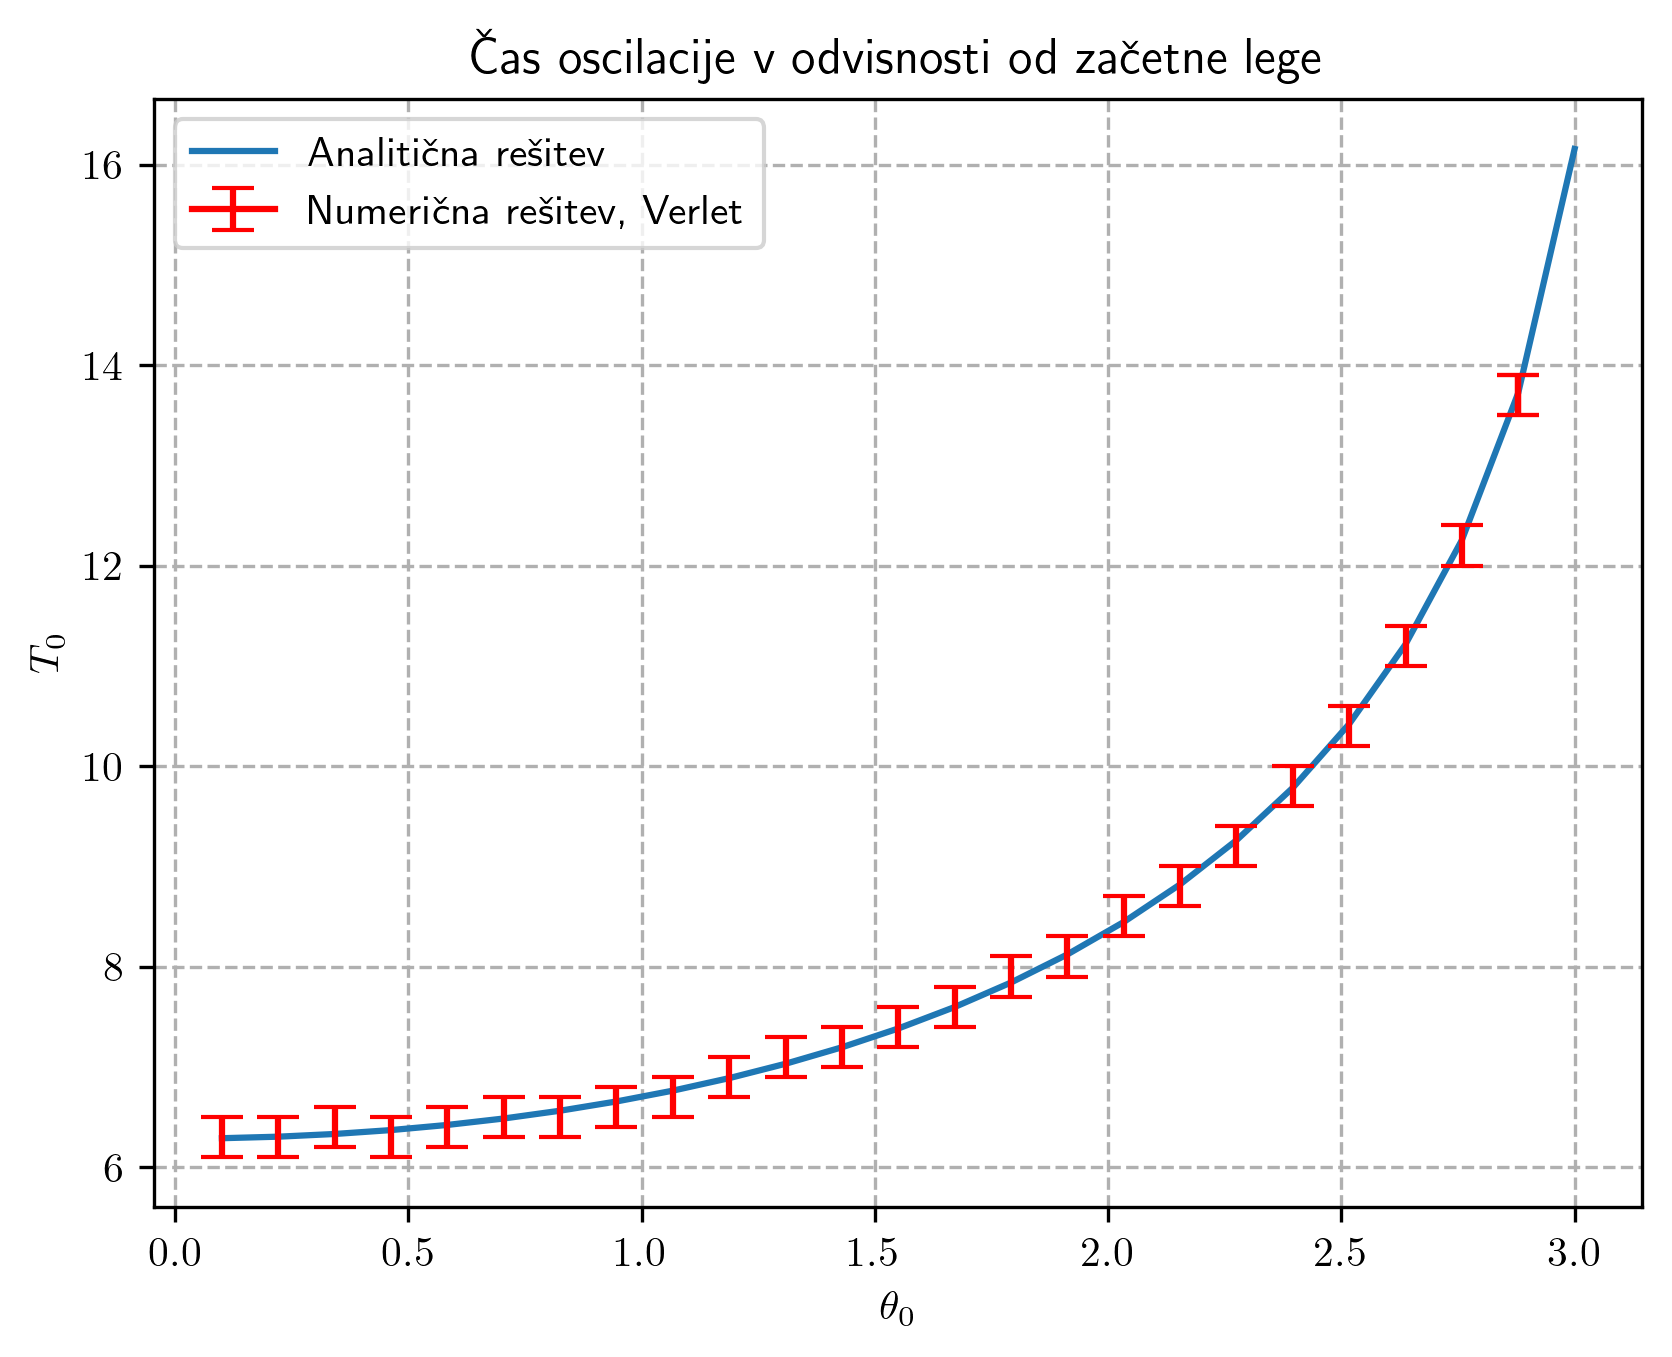

In [489]:
plt.title('Čas oscilacije v odvisnosti od začetne lege')
plt.xlabel('$\\theta_0$')
plt.ylabel('$T_0$')

theta_0s = np.linspace(0.1, 3, 25)
T_0s = T_0_analytic(theta_0s)

plt.plot(theta_0s, T_0s, label='Analitična rešitev')
t = np.arange(0, 30, 0.1)
zero = None
for i, theta_0 in enumerate(theta_0s):
    (x, v) = verlet(nihanje, theta_0, 0.0, t)
    peaks, _ = find_peaks(x)
    if len(peaks) < 2:
        continue
    T_0 = t[peaks[1]] - t[peaks[0]]
    plt.errorbar(theta_0, T_0, yerr=0.2, fmt='', c='r', capsize=5)
    zero = T_0
# add entries to legend
plt.errorbar(theta_0s[-2], zero, yerr=0.2, fmt='', c='r', capsize=5, label='Numerična rešitev, Verlet')
plt.grid()
plt.legend()
plt.show()



### Primerjava integracijskih metod

Sedaj primerjamo med sabo različne numerične metode za integracijo problema. Od prej poznamo že Eulerjevo metodo, Heunovo metodo, Runge-Kutta 4. reda, le-tem pa dodamo še 2 simplektični; Verletovo metodo in PEFRL. 

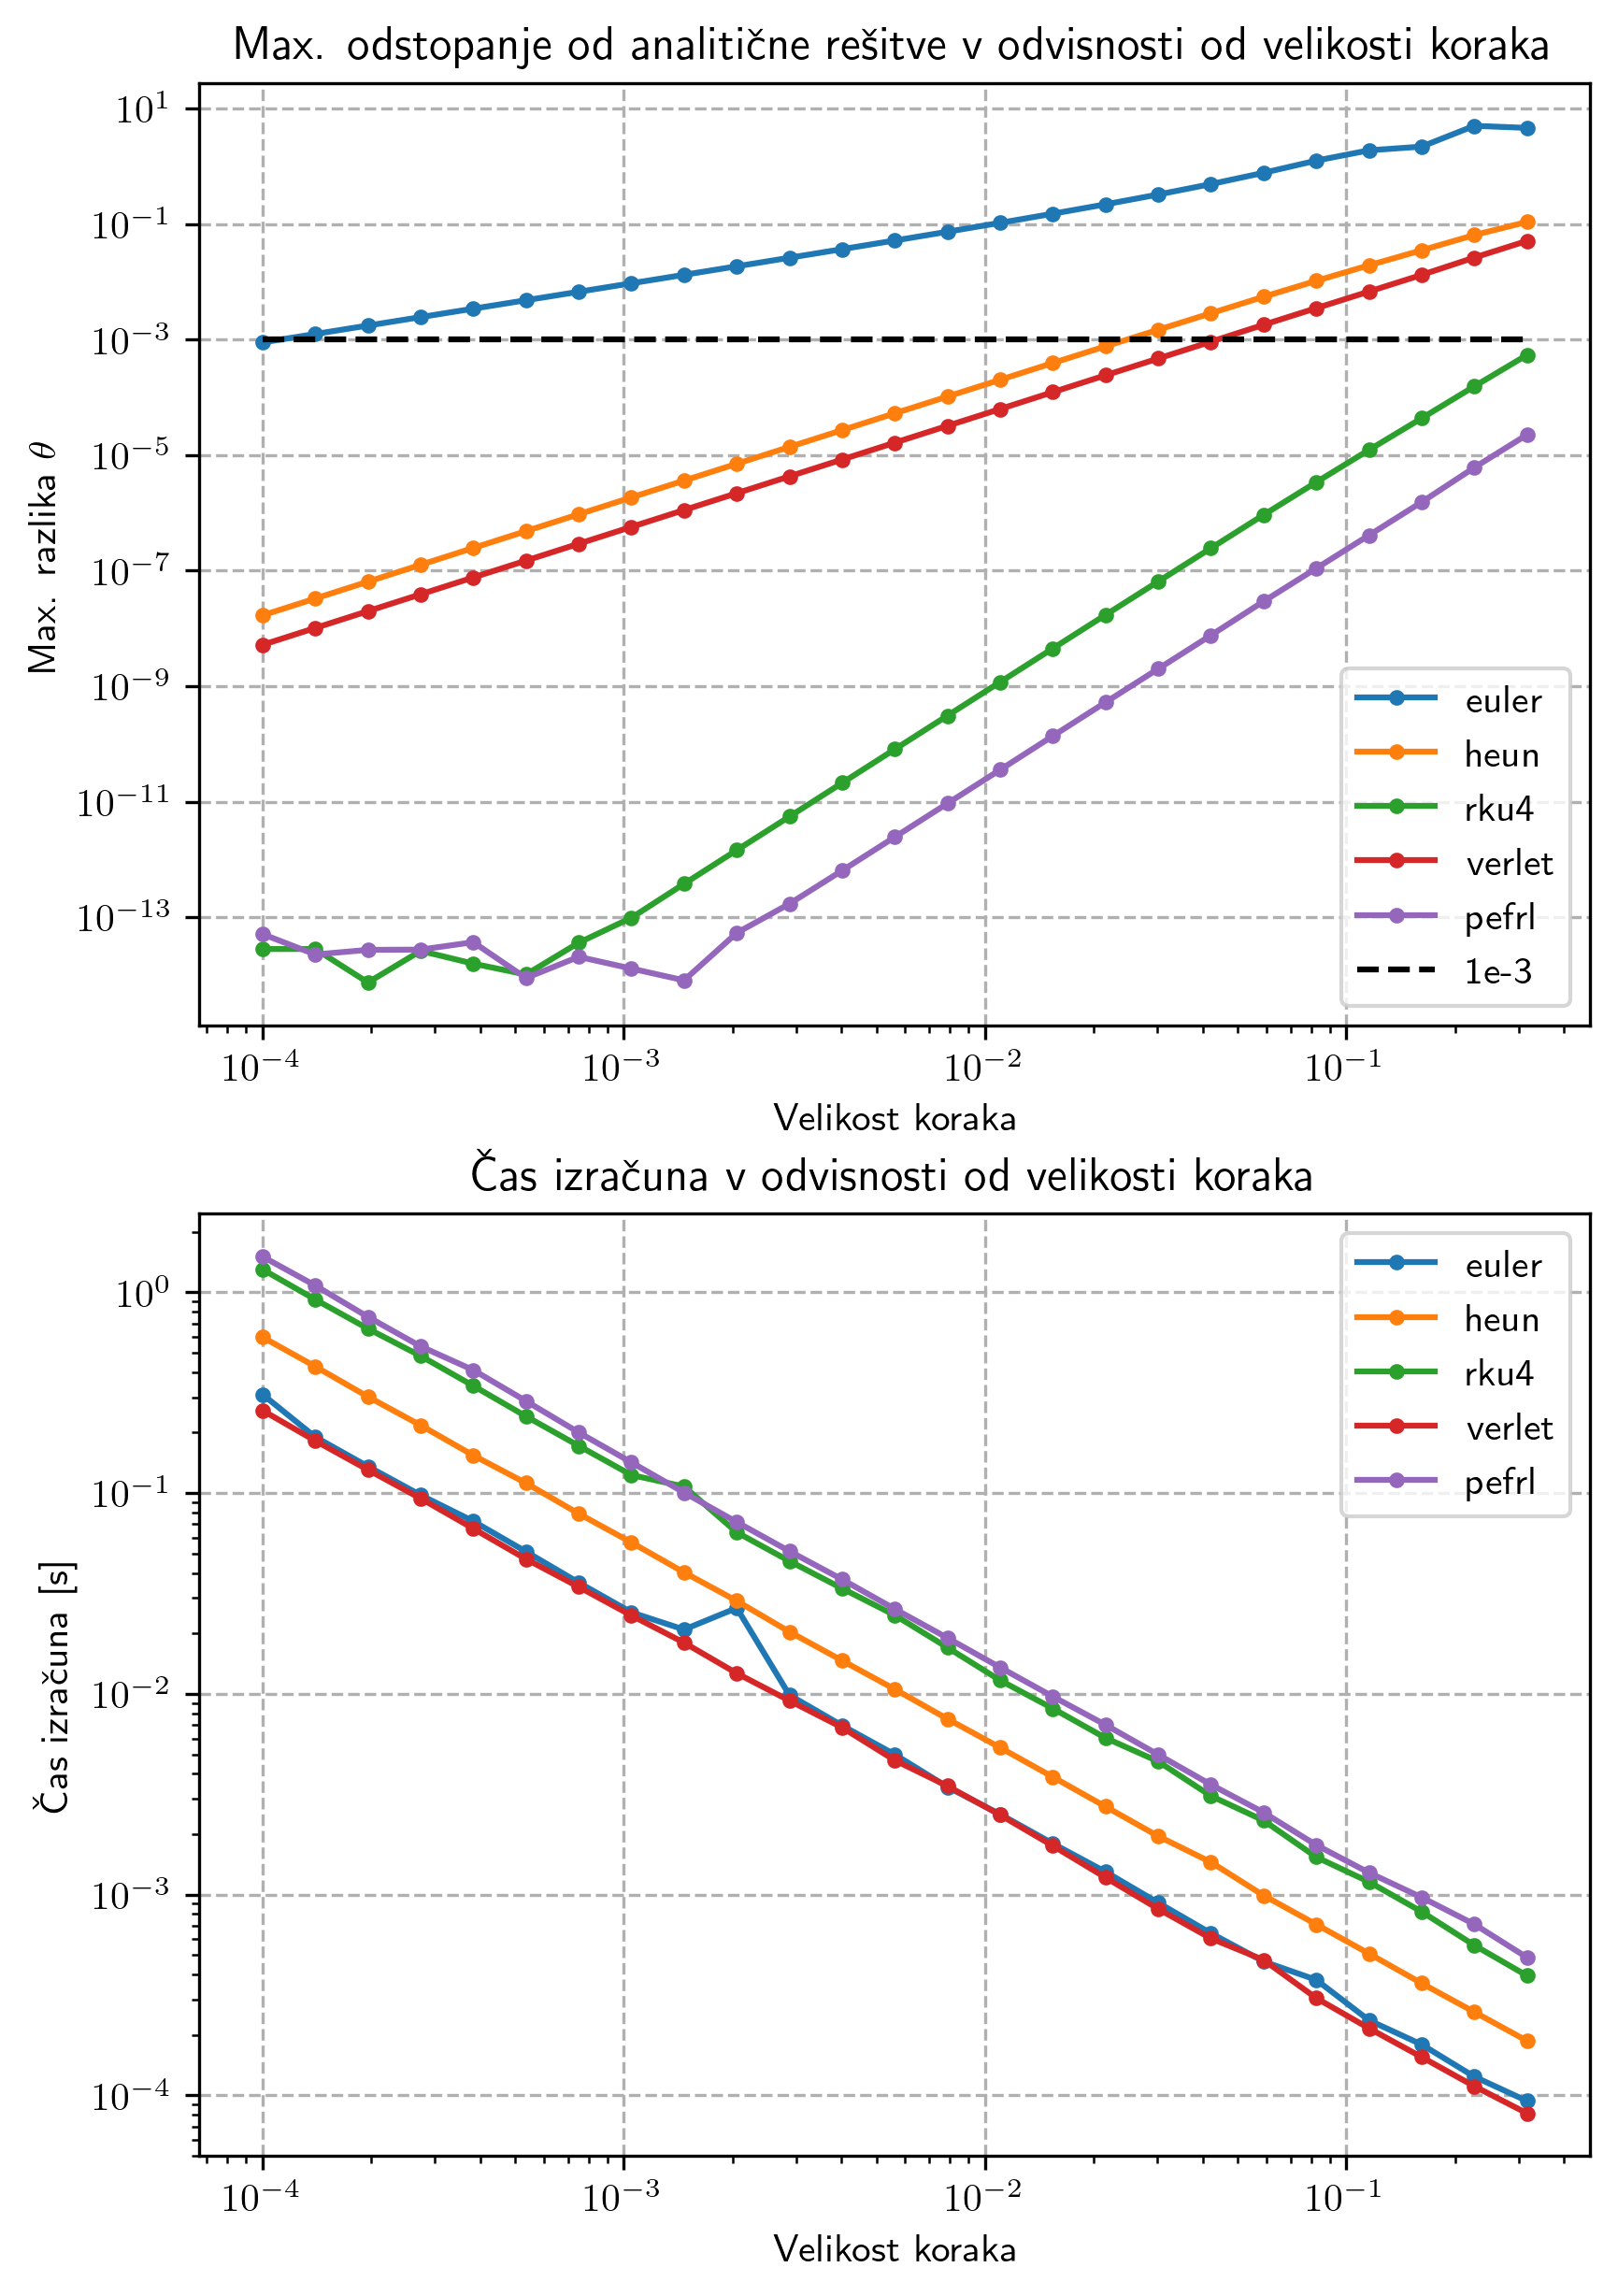

In [490]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6.4, 9.6))

for metoda in [euler, heun, rku4, verlet, pefrl]:
    ax1.set_title('Max. odstopanje od analitične rešitve v odvisnosti od velikosti koraka')
    ax1.set_xlabel('Velikost koraka')
    ax1.set_ylabel('Max. razlika $\\theta$')
    ax1.set_yscale('log')
    ax1.set_xscale('log')

    ax2.set_title('Čas izračuna v odvisnosti od velikosti koraka')
    ax2.set_xlabel('Velikost koraka')
    ax2.set_ylabel('Čas izračuna [s]')
    ax2.set_yscale('log')
    ax2.set_xscale('log')

    step_size = np.logspace(-4, -0.5, 25)
    #step_size = np.linspace(0.001, 0.1, 5)
    max_error = np.zeros_like(step_size)
    calc_time = np.zeros_like(step_size)
    for i, step in enumerate(step_size):
        start_time = timeit.default_timer()
        #print(f'{metoda.__name__} - {step}')
        t = np.arange(0, 15, step)
        if metoda in [euler, heun, rku4]:
            x_vec = metoda(nihanje_vec, np.array([1., 0.]), t)
            x = x_vec[:, 0]
        else:
            (x, v) = metoda(nihanje, 1., 0., t)
        calc_time[i] = timeit.default_timer() - start_time
        y_anal = theta_analytic(t)
        diff = np.abs(y_anal - x)
        max_error[i] = np.max(diff)

    ax1.plot(step_size, max_error, marker='.', label=f'{metoda.__name__}')
    ax2.plot(step_size, calc_time, marker='.', label=f'{metoda.__name__}')

ax1.hlines(1e-3, step_size[0], step_size[-1], color='black', linestyle='--', label='1e-3')
ax1.grid()
ax1.legend()
ax2.grid()
ax2.legend()
plt.show()

S funkcijo `find_peaks` sedaj preverimo še kaj se dogaja z amplitudo skozi dolg čas. Ugotovimo, da se napaka sistematično veča. Če pogledamo sedaj še kaj se dogaja z energijo sistema skozi čas, ugotovimo, da se le ta sistematično spreminja. Le pri simplektičnih metodah sicer niha, ampak skozi daljši čas ostaja konstantna - kar je tudi naš cilj.

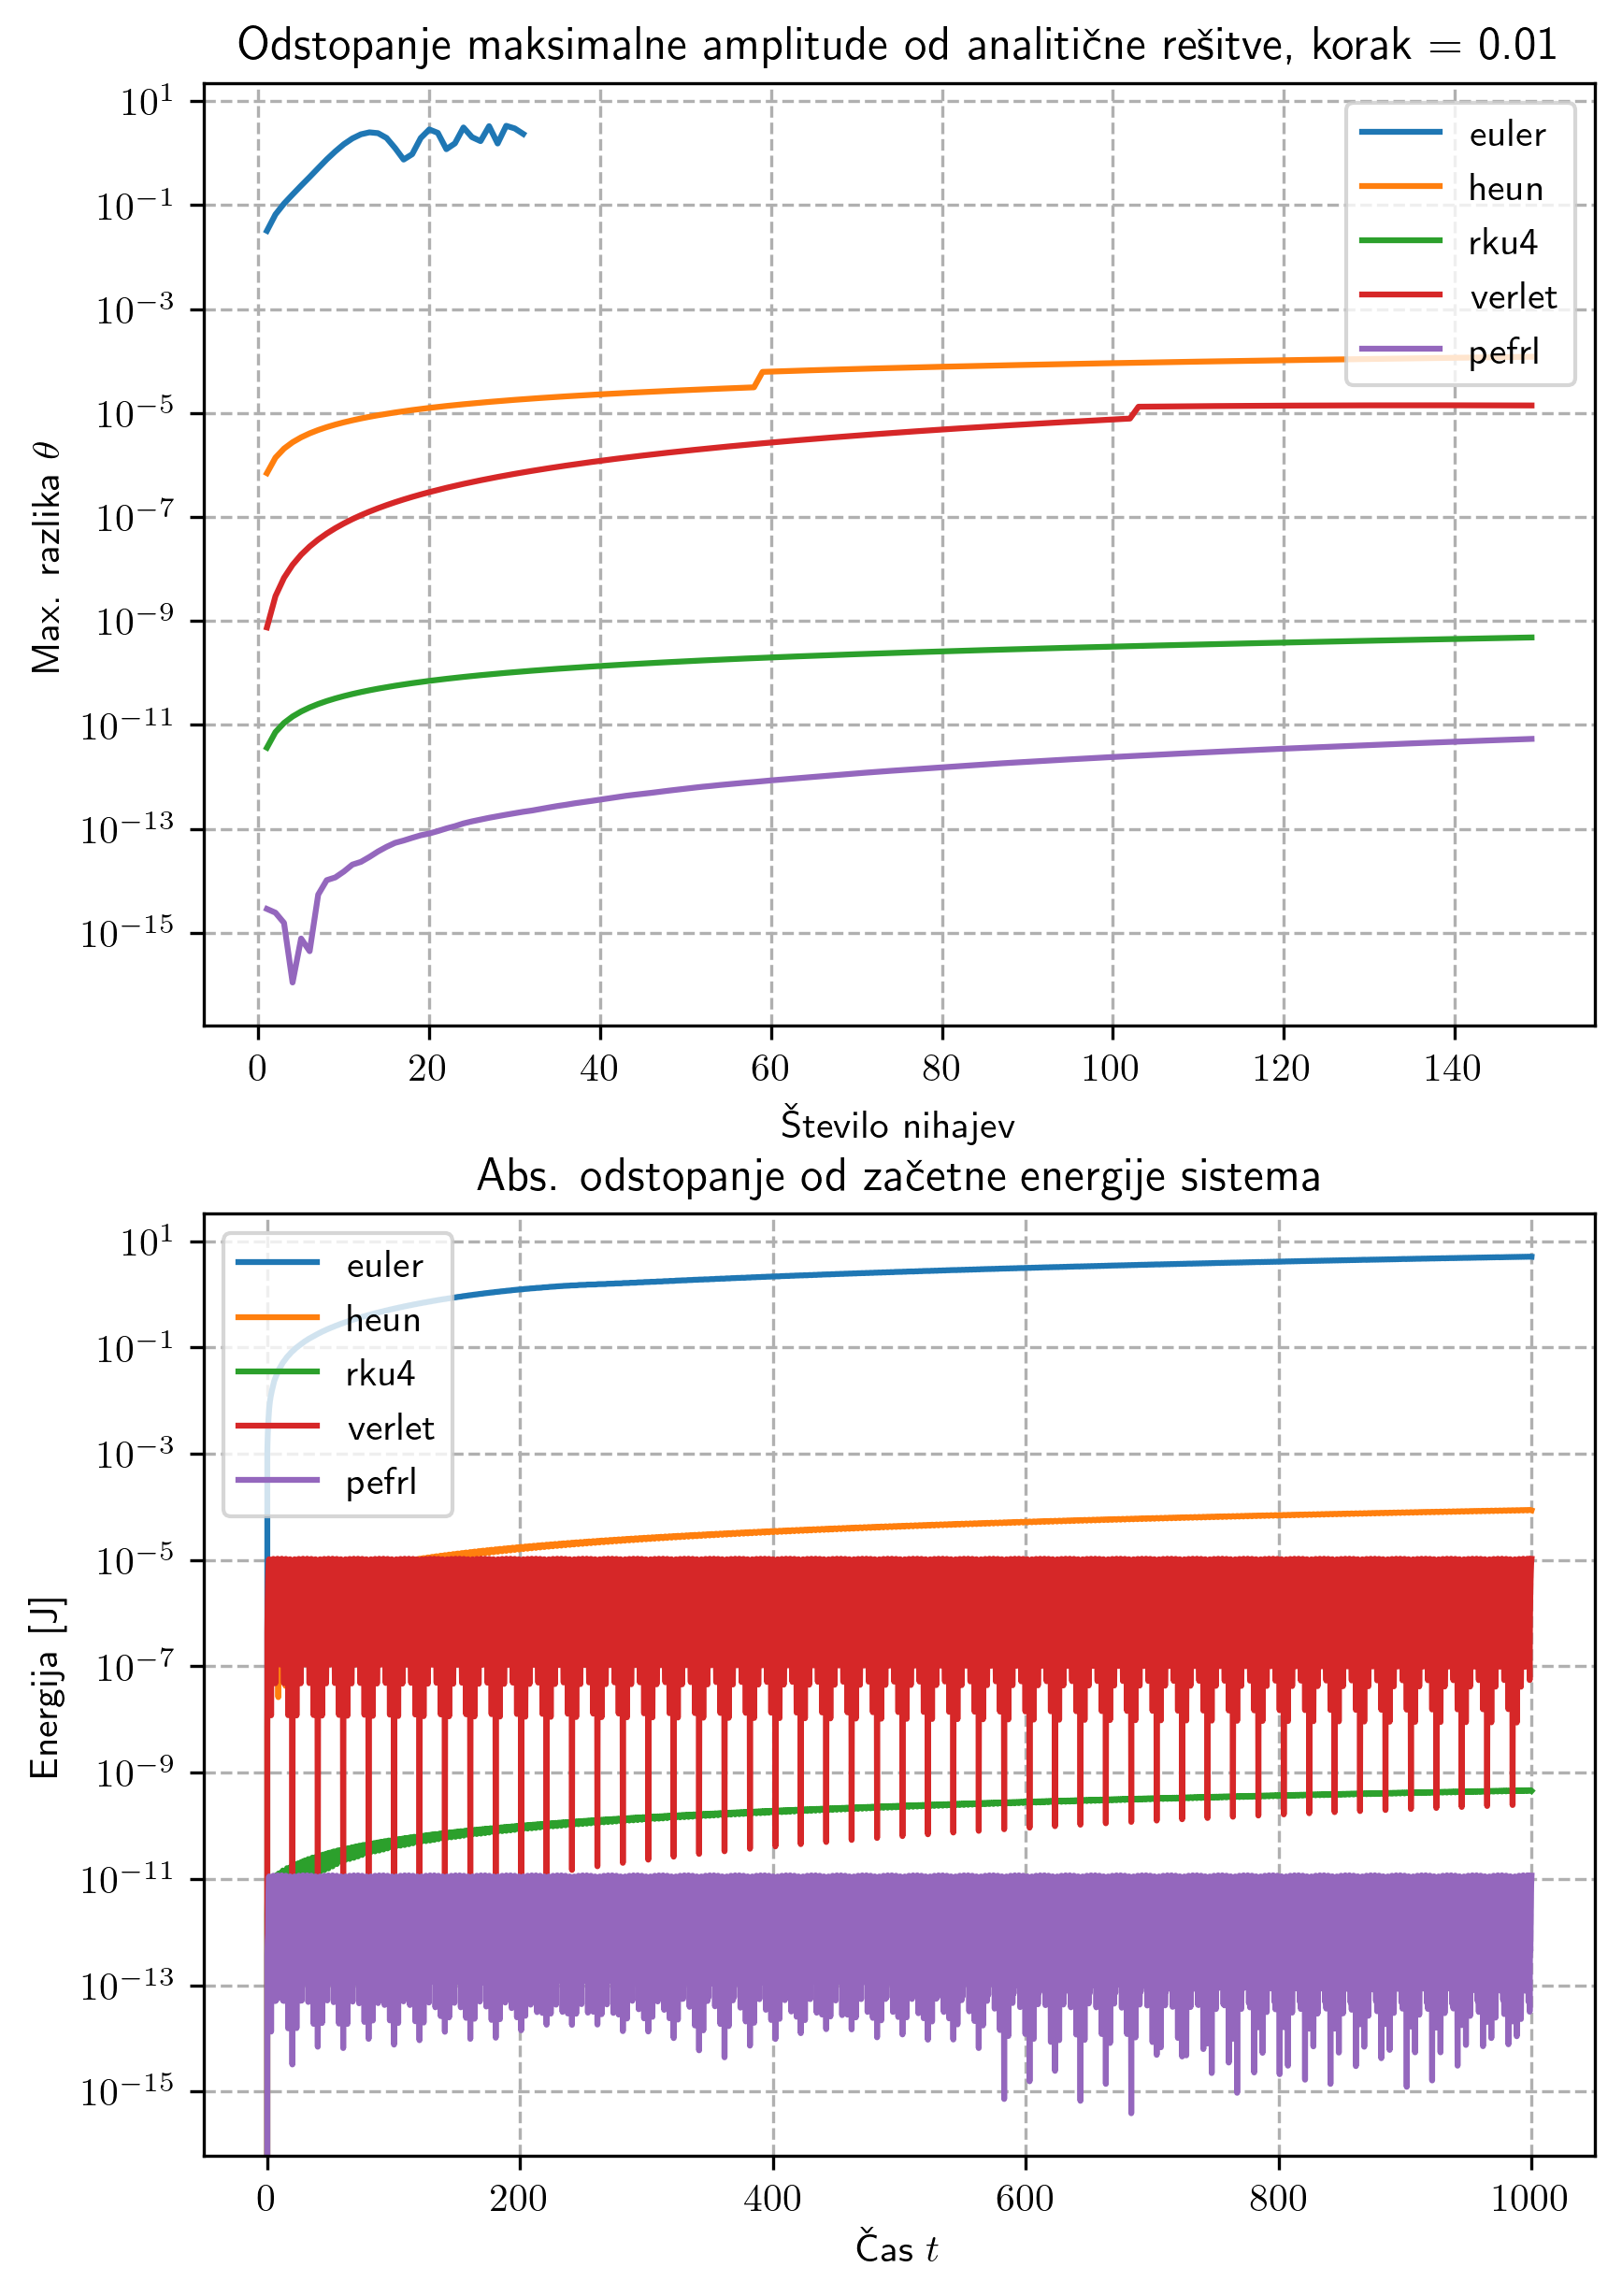

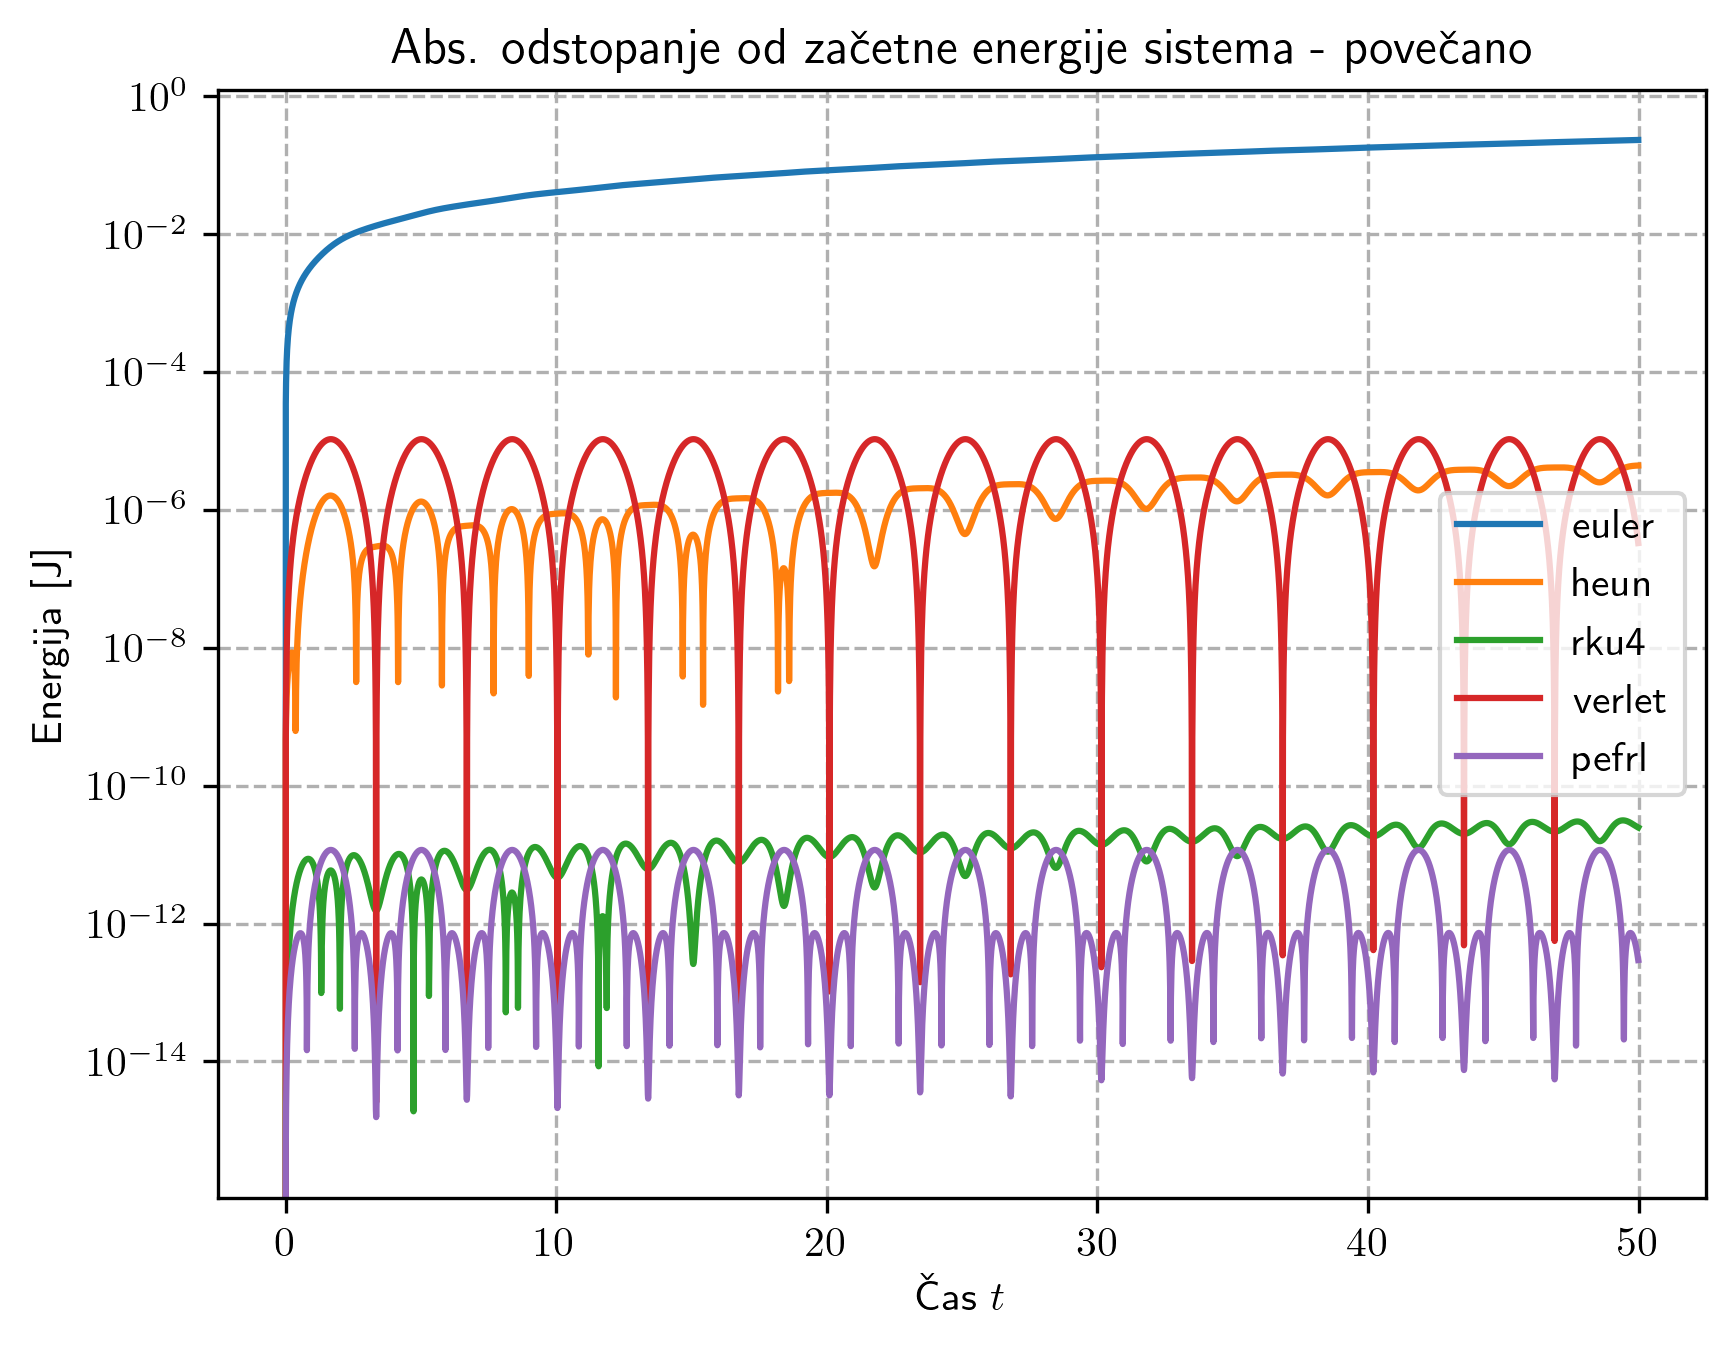

In [491]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6.4, 9.6))

fig, (ax3) = plt.subplots(1, 1, figsize=(6.4, 4.8))


for metoda in [euler, heun, rku4, verlet, pefrl]:
    ax1.set_title('Odstopanje maksimalne amplitude od analitične rešitve, korak = 0.01')
    ax1.set_xlabel('Število nihajev')
    ax1.set_ylabel('Max. razlika $\\theta$')
    ax1.set_yscale('log')

    ax2.set_title('Abs. odstopanje od začetne energije sistema')
    ax2.set_xlabel('Čas $t$')
    ax2.set_ylabel('Energija [J]')
    ax2.set_yscale('log')

    ax3.set_title('Abs. odstopanje od začetne energije sistema - povečano')
    ax3.set_xlabel('Čas $t$')
    ax3.set_ylabel('Energija [J]')
    ax3.set_yscale('log')

    ax4.set_title('Max. odstopanje od analitične rešitve v odvisnosti od velikosti koraka')
    ax4.set_xlabel('Velikost koraka')
    ax4.set_ylabel('Max. razlika $\\theta$')
    ax4.set_yscale('log')

    #print(f'{metoda.__name__} - {step}')
    
    t = np.arange(0, 1000, 0.01)
    if metoda in [euler, heun, rku4]:
        x_vec = metoda(nihanje_vec, np.array([1., 0.]), t)
        x = x_vec[:, 0]
        v = x_vec[:, 1]
    else:
        (x, v) = metoda(nihanje, 1., 0., t)

    peaks, _ = find_peaks(x)
    theta = theta_analytic(t)
    diff = np.abs(theta - x)
    indices = np.arange(len(t[peaks])) + 1
    E0 = 1.0 - np.cos(1.0)
    p=30
    energy = np.abs(1-np.cos(x)+v**2/2-E0)

    ax1.plot(indices, diff[peaks], label=f'{metoda.__name__}')
    ax2.plot(t[::p], energy[::p], label=f'{metoda.__name__}')
    ax3.plot(t[:5000], energy[:5000], label=f'{metoda.__name__}')    

ax1.grid()
ax1.legend()
ax2.grid()
ax2.legend()
ax3.grid()
ax3.legend()

plt.show()

Poglejmo si še, kako se simplektične in ostale metode razlikujejo na faznem portretu. Kot vidimo na spodnjem grafu, se rešitev s pomočjo metode Runge-Kutta po dolgem času vrača v ravnovesno lego. Medtem ko rešitev s simplektično metodo Verlet ohranja "orbito" oz. energijo.  

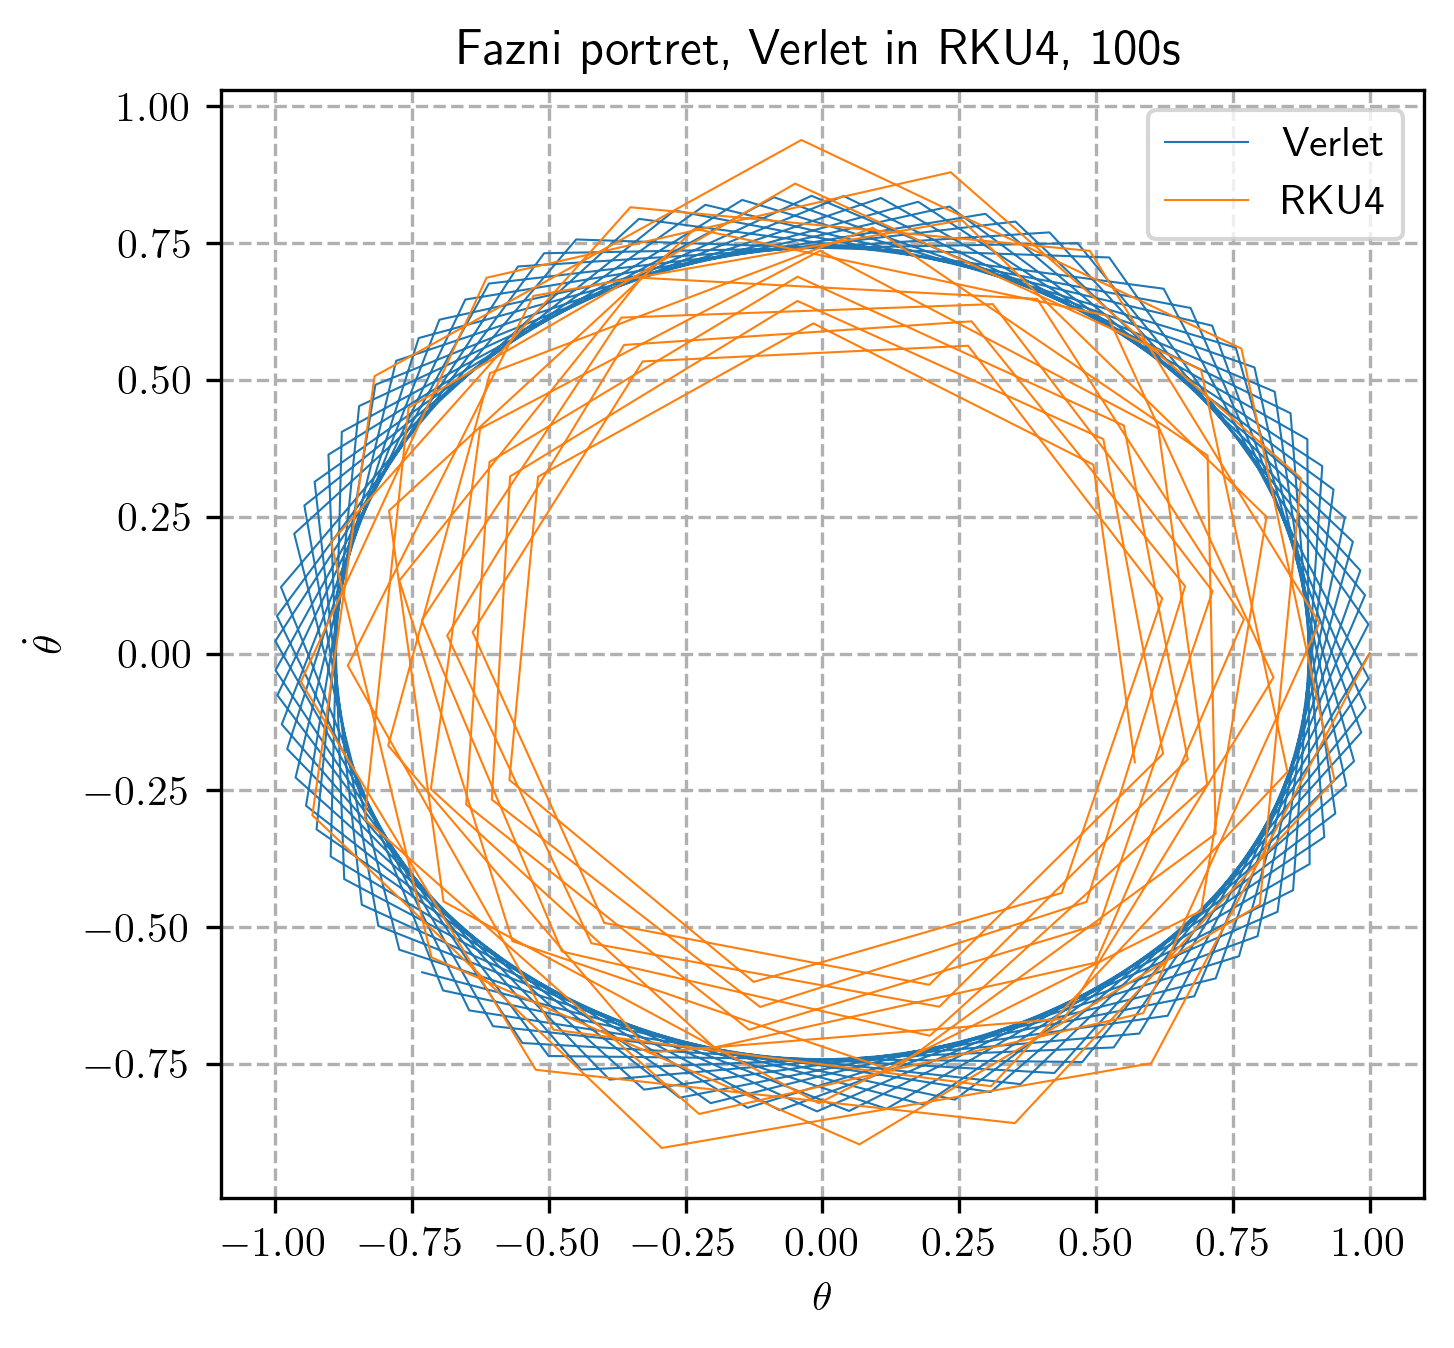

In [492]:


t = np.arange(0, 100, 1)
(x1, v1) = verlet(nihanje, 1., 0., t)
vec = rku4(nihanje_vec, np.array([1., 0.]), t)
x2, v2 = vec[:, 0], vec[:, 1]

plt.plot(x1, v1, label='Verlet', linewidth=0.5)
plt.plot(x2, v2, label='RKU4', linewidth=0.5)

plt.grid()
plt.gca().set_aspect("equal")
plt.legend()

plt.xlabel('$\\theta$')
plt.ylabel('$\\dot{\\theta}$')
plt.title('Fazni portret, Verlet in RKU4, 100s')

plt.show()

## Dodatek: Resonančna krivulja vzbujenega dušenega matematičnega nihala

V dodatku analiziramo vzbujano dušeno matematično nihalo. Nihalo opišemo s tremi parametri; dušilnim faktorjem $\beta$, vzbujalo amplitudo $v$ in vzbujalno frevenco $\omega$. Začetni pogoji so enaki kot pri prejšnji nalogi; $\theta = 1$ in $\dot \theta = 0$. Opazimo, da se sistem za nekatere vrednosti parametrov obnaša kaotično. Pri zmernih vrednosti $v$, se sistem obnaša mirno, pričakovano. Za večje vrednosti pa pobezlja. Podobno lahko opazimo tudi pri drugačnem spreminjanju parametrov. Na koncu izrišemo še resonančno krivuljo, ki je stabilna le nekje do $v \approx 0.8 $.

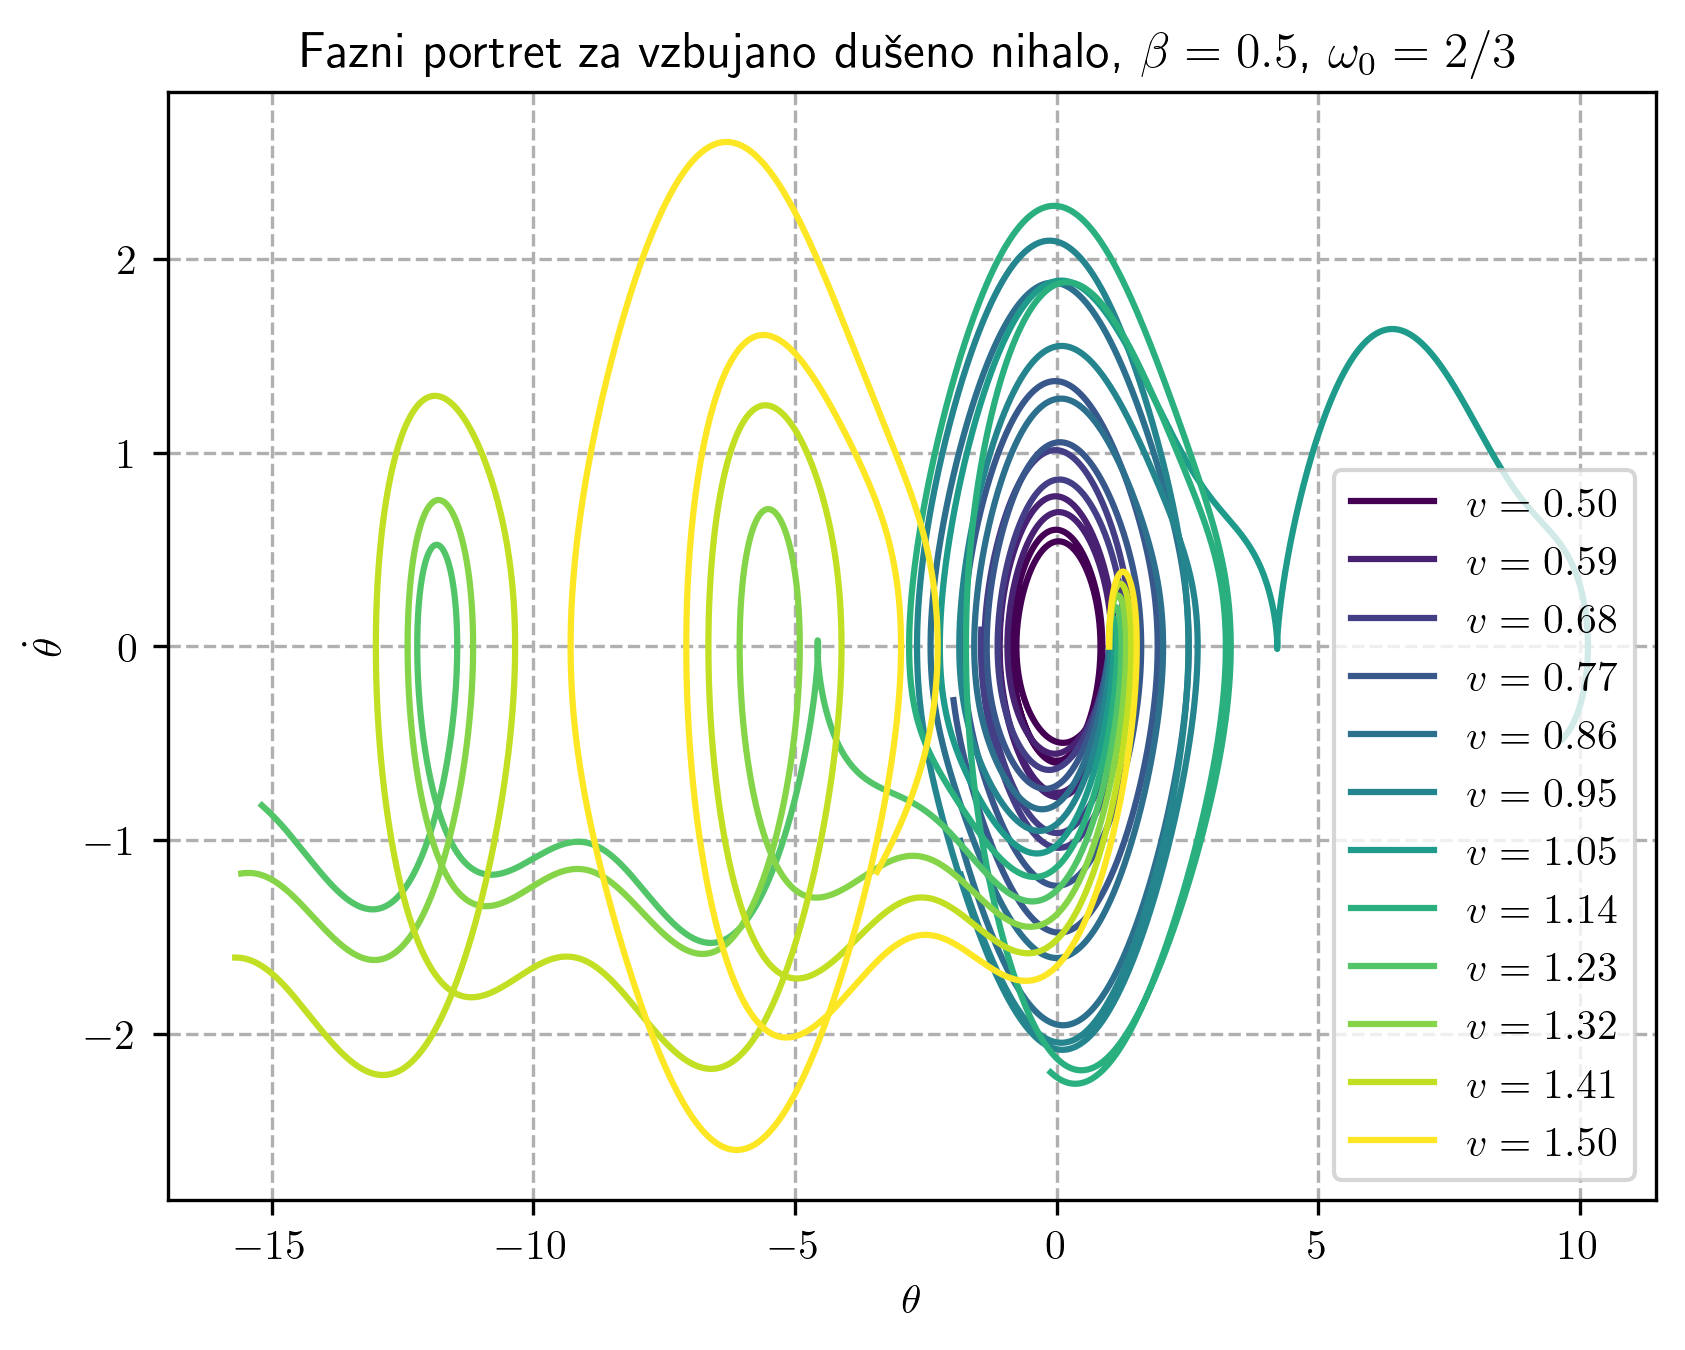

In [542]:
def nihanje_duseno(x, t, args=None):
    if args is not None:
        v, omega, beta = args
    d = np.zeros_like(x)
    d[0] = x[1]
    d[1] = v*np.cos(omega*t)-np.sin(x[0])-beta*x[1]
    return d

t = np.arange(0, 25, 0.01)

beta = 0.5
omega_0 = 2/3
v_s = np.linspace(0.5, 1.5, 12)

cmap = plt.colormaps.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(v_s)))

for i, v in enumerate(v_s):
    args = (v, omega_0, beta)
    f = lambda x, t: nihanje_duseno(x, t, args)
    vec = rku4(f, np.array([1., 0.]), t)
    x = vec[:, 0]
    y = vec[:, 1]
    plt.plot(x, y, label=f'$v = {v:.2f}$', color=colors[i])


plt.title('Fazni portret za vzbujano dušeno nihalo, $\\beta = 0.5$, $\\omega_0 = 2/3$')
plt.xlabel('$\\theta$')
plt.ylabel('$\\dot{\\theta}$')
plt.grid()
plt.legend()
plt.show()

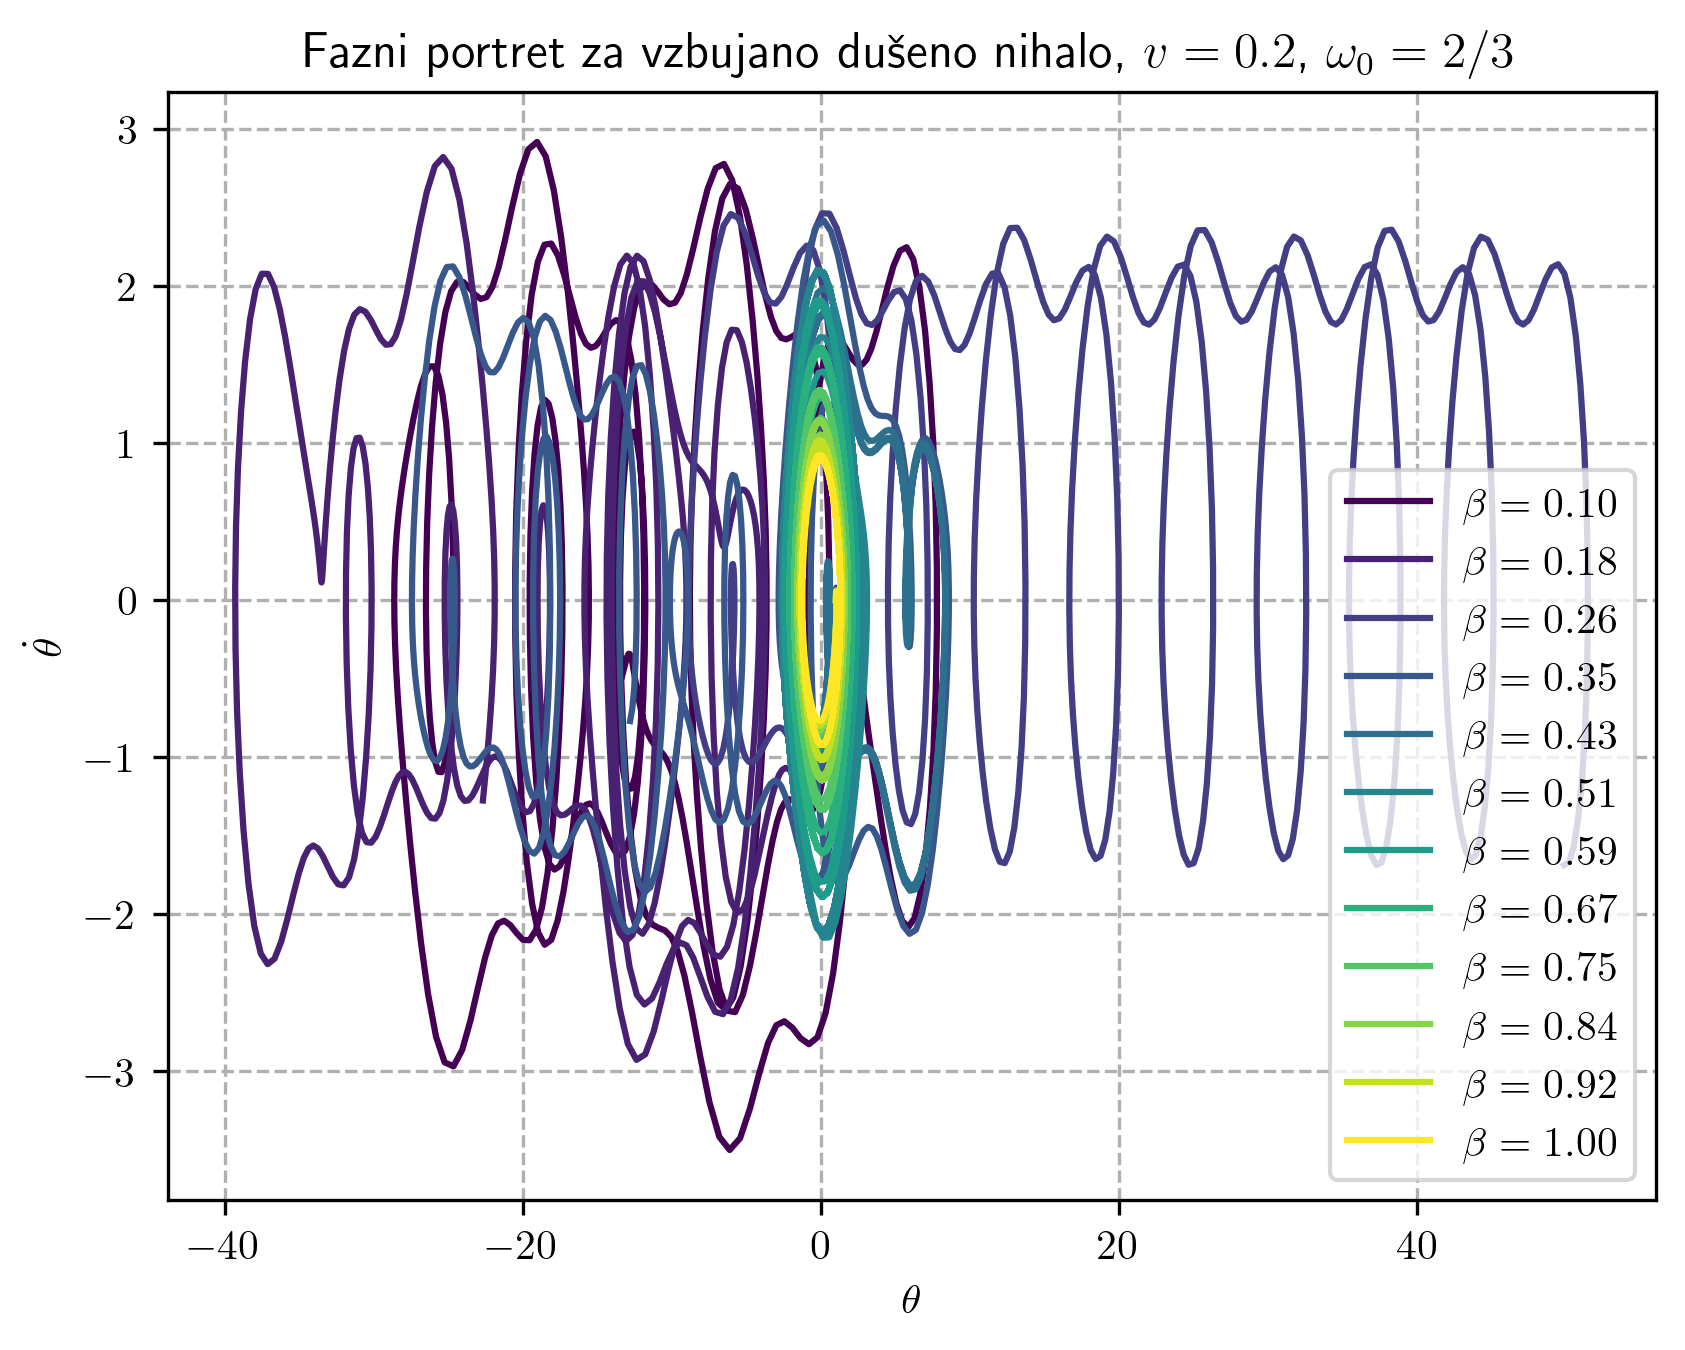

In [524]:
beta_s = np.linspace(0.1, 1, 12)
omega_0 = 2/3
v = 1
cmap = plt.colormaps.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(beta_s)))

plt.cla()

for i, beta in enumerate(beta_s):
    args = (v, omega_0, beta)
    f = lambda x, t: nihanje_duseno(x, t, args)
    vec = rku4(f, np.array([1., 0.]), t)
    x = vec[:, 0]
    y = vec[:, 1]
    plt.plot(x, y, label=f'$\\beta = {beta:.2f}$', color=colors[i])


plt.title('Fazni portret za vzbujano dušeno nihalo, $v = 0.2$, $\\omega_0 = 2/3$')
plt.xlabel('$\\theta$')
plt.ylabel('$\\dot{\\theta}$')
plt.grid()
plt.legend()
plt.show()

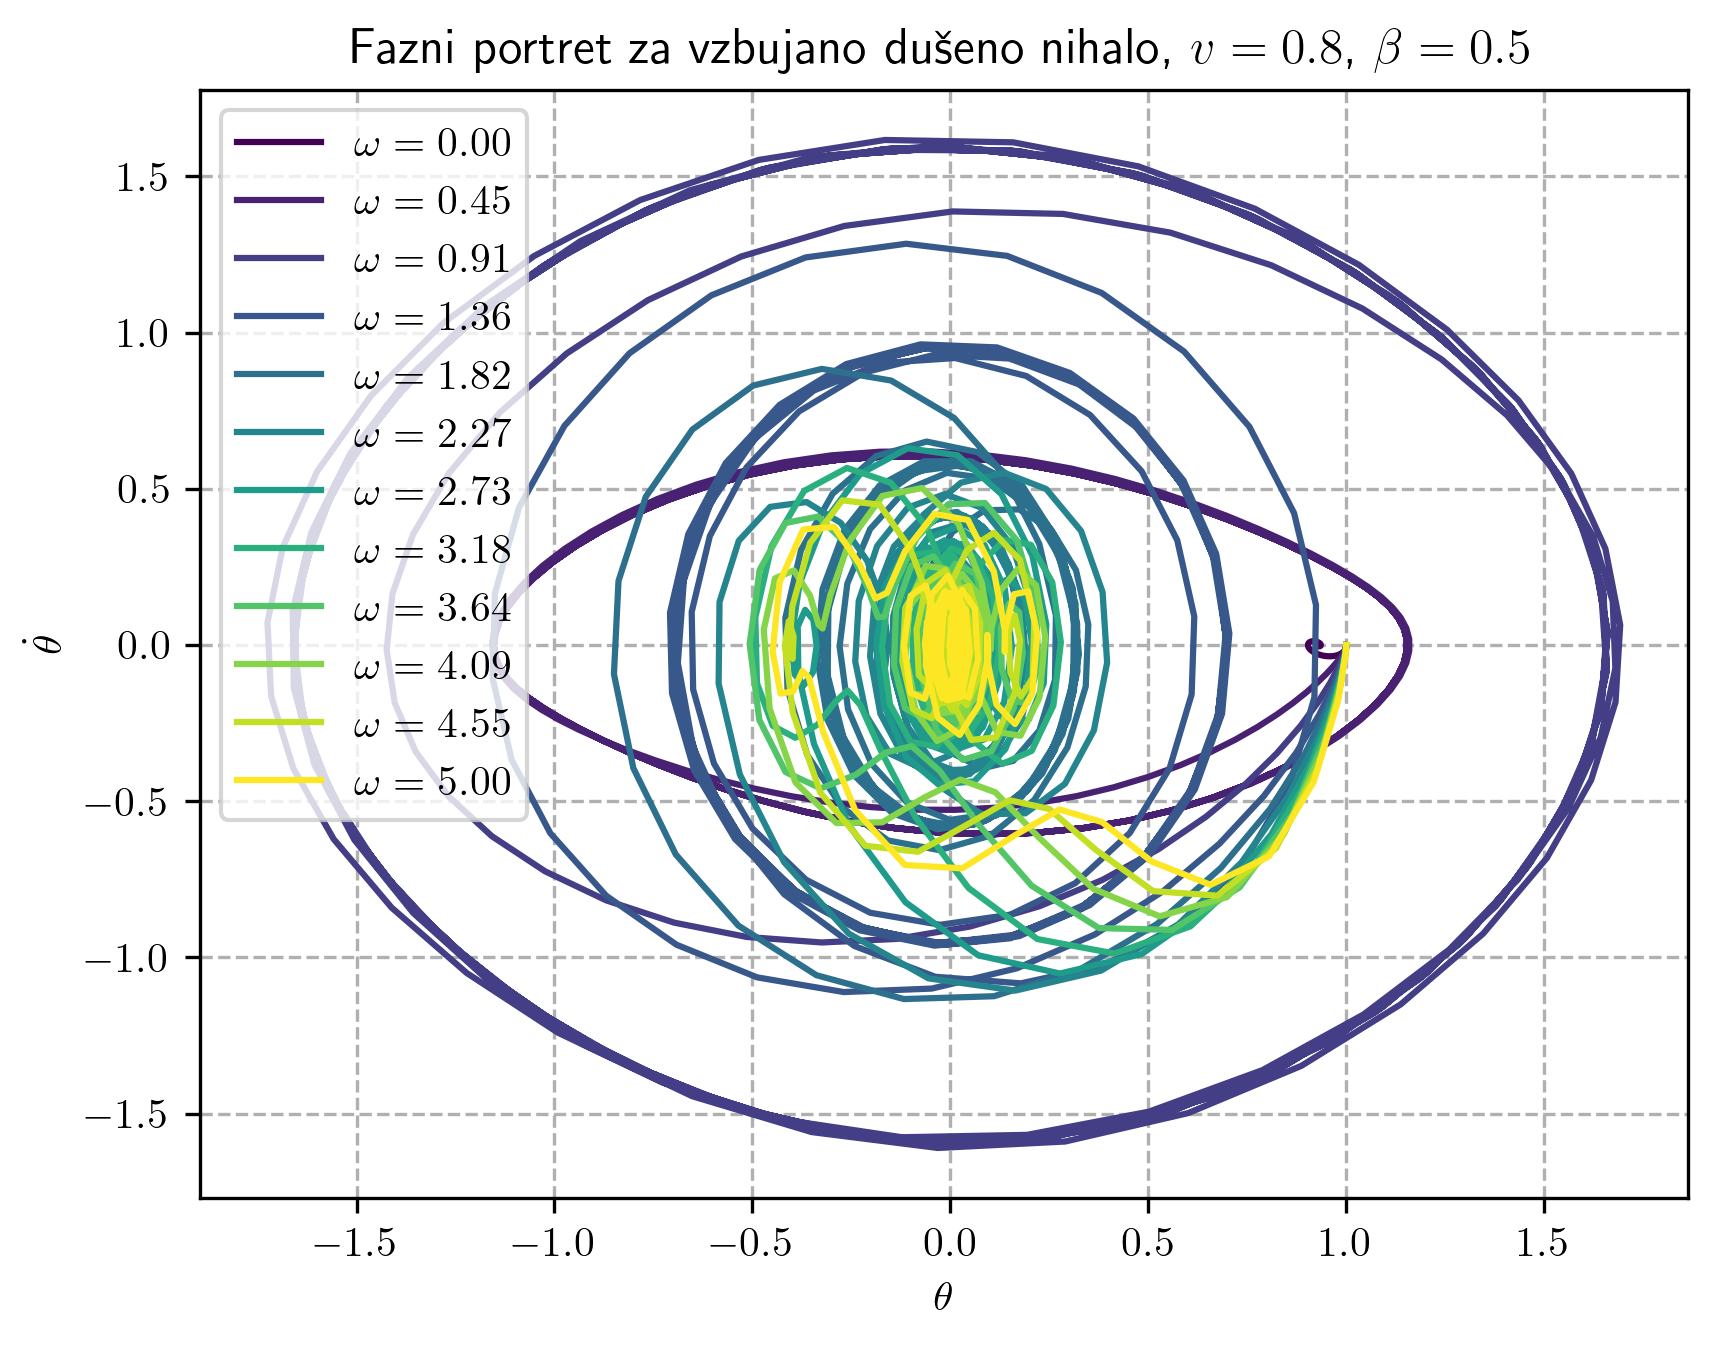

In [528]:
beta = 0.5
omega_0s = np.linspace(0, 5, 12)
v = 0.8
cmap = plt.colormaps.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(omega_0s)))

plt.cla()

for i, omega in enumerate(omega_0s):
    args = (v, omega, beta)
    f = lambda x, t: nihanje_duseno(x, t, args)
    vec = rku4(f, np.array([1., 0.]), t)
    x = vec[:, 0]
    y = vec[:, 1]
    plt.plot(x, y, label=f'$\omega = {omega:.2f}$', color=colors[i])


plt.title('Fazni portret za vzbujano dušeno nihalo, $v = 0.8$, $\\beta = 0.5$')
plt.xlabel('$\\theta$')
plt.ylabel('$\\dot{\\theta}$')
plt.grid()
plt.legend()
plt.show()

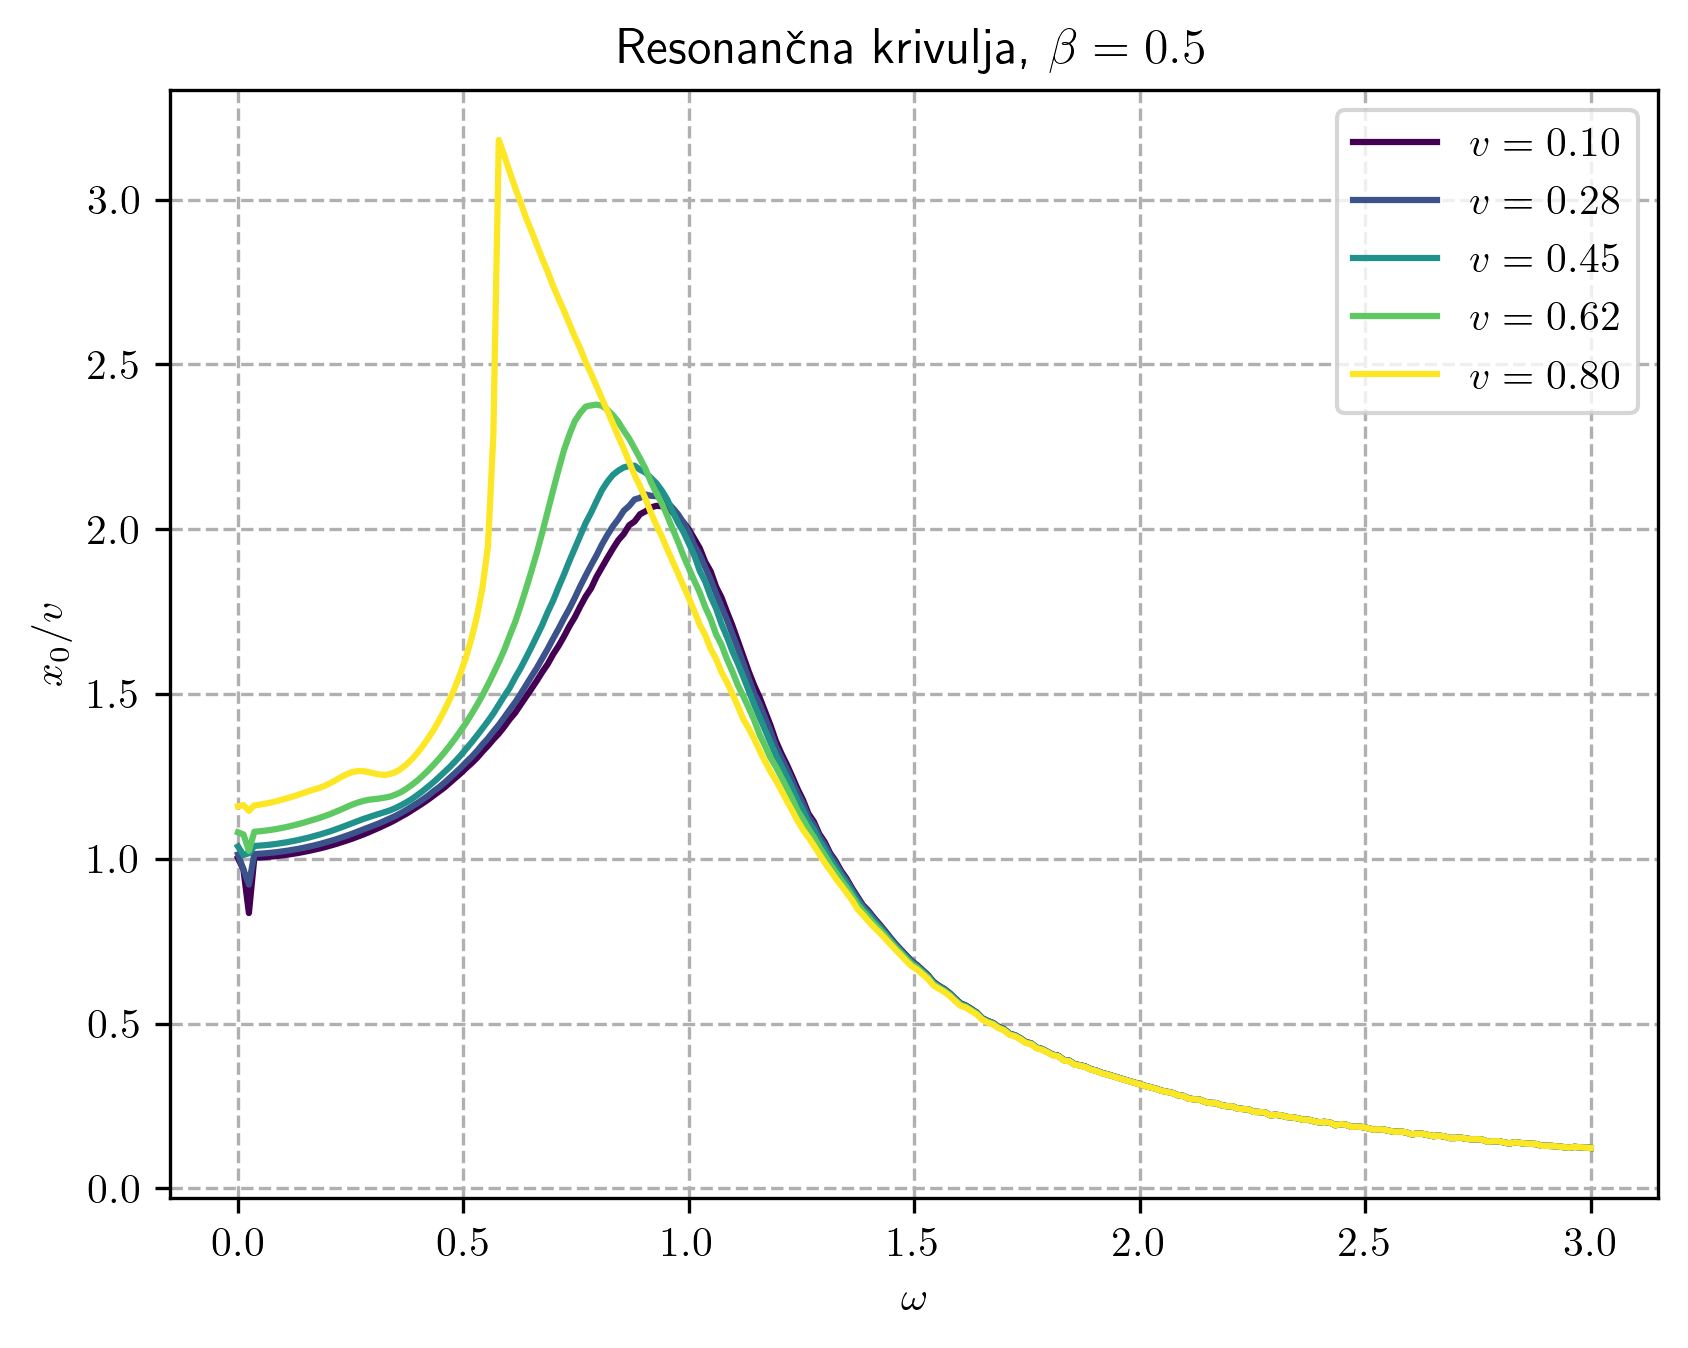

In [541]:
t = np.linspace(0, 100, 500)
omegas = np.linspace(0, 3, 250)
vs = np.linspace(0.1, 0.8, 5)
beta = 0.5
cmap = plt.colormaps.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, len(vs)))

for i, v in enumerate(vs):
    peaks = []
    for omega in omegas:
        v_ = v
        args = (v_, omega, beta)
        f = lambda x, t: nihanje_duseno(x, t, args)
        vec = rku4(f, np.array([1., 0.]), t)
        x = vec[:, 0]
        y = vec[:, 1]
        peak, _ = find_peaks(np.abs(x))
        if len(peak) == 0:
            peaks.append(0)
        else:
            peaks.append(np.abs(x[peak[-1]]))
    peaks = np.array(peaks)
    plt.plot(omegas, peaks/v_, c = colors[i], label=f'$v = {v:.2f}$')
plt.xlabel("$\omega$")
plt.ylabel("$x_0/v$")
plt.title("Resonančna krivulja, $\\beta = 0.5$"),
plt.legend()
plt.grid()
plt.show()


## Zaključek

Tekom te naloge smo primerjali različne metode integracije za reševanje diferencialnih enačb matematičnega nihala. Ugotovili smo, da simplektične metode, kot sta Verletova in PEFRL, najboljše ohranjajo energijo sistema skozi čas, medtem ko klasične metode, kot je Runge-Kutta, lahko vodijo do sistematičnega kopičenja napak. Analizirali smo tudi resonančno krivuljo vzbujenega dušenega nihala in opazili kaotično obnašanje pri večjih amplitudah vzbujanja. Izkušnje kažejo, da je izbira metode ključna za natančnost in stabilnost dolgoročnih simulacij.

---
Luka Skeledžija, [Github source 🔗](https://github.com/lukaske/mafijski-praktikum/tree/main/MFPR/07_newton), 2024